In [18]:
#This is the function to get the blue box position
def get_box_data(index, hdf5_data):
    """
    get `left, top, width, height` of each picture
    :param index:
    :param hdf5_data:
    :return:
    """
    meta_data = dict()
    meta_data['height'] = []
    meta_data['label'] = []
    meta_data['left'] = []
    meta_data['top'] = []
    meta_data['width'] = []

    def print_attrs(name, obj):
        vals = []
        if obj.shape[0] == 1:
            vals.append(obj[0][0])
        else:
            for k in range(obj.shape[0]):
                vals.append(int(hdf5_data[obj[k][0]][0][0]))
        meta_data[name] = vals

    box = hdf5_data['/digitStruct/bbox'][index]
    hdf5_data[box[0]].visititems(print_attrs)
    return meta_data

def get_name(index, hdf5_data):
    name = hdf5_data['/digitStruct/name']
    return ''.join([chr(v[0]) for v in hdf5_data[name[index][0]].value])

In [19]:
#Do not need to run this cell for this task. This is just a test of getting the data of all the images
import h5py
from tqdm import tqdm

mat_data = h5py.File('./train/digitStruct.mat')
size = mat_data['/digitStruct/name'].size

for _i in tqdm(range(size)):
    pic = get_name(_i, mat_data)
    box = get_box_data(_i, mat_data)

100%|██████████| 33402/33402 [08:23<00:00, 66.29it/s] 


In [74]:
#This is to read the image from file into python
from scipy import misc
import glob
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

X_train=[]
directory="/Users/Shimeng/Documents/Master_Columbia_2018/E4040 NN and Deep Learning/Final Project/train/"
img_type=".png"
for i in range(1,33402):
    image_name=[i,img_type]
    values = ''.join(str(v) for v in image_name)
    folder=[directory,values] 
    folder=''.join(folder)
    image = misc.imread(folder)
    X_train.append(image)


/Users/Shimeng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  app.launch_new_instance()


In [146]:
# Run this cell will be able to provide you the cropped image in 54*54*3 format
import h5py
from tqdm import tqdm
import matplotlib.pyplot as plt
import cv2

mat_data = h5py.File('./train/digitStruct.mat')
size = mat_data['/digitStruct/name'].size

#print (box)
label_Final = []
Pic_crop_Final = []
for i in range(33401):
    Array = np.array(X_train[i])
    pic = get_name(i, mat_data)
    box = get_box_data(i, mat_data)
    label = box['label']
    label_Final.append(''.join(str(x%10) for x in label))
    #get the location without increase
#     H = int(max(box['top'])+max(box['height']))
#     L = int(min(box['left']))
#     T = int(min(box['top']))
#     W = int(max (box ['left'])+ max(box['width']))
 
    Test = label_Final[0]

    #Increase location by 30%
    
    H = int(round((max(box['top'])+max(box['height'])) *1.03))
    L = int(round (min(box['left']) *(0.97)))
    if L<0:
        L =0
    T = int(round (min(box['top'])*(0.97)))
    if T<0:
        T = 0
    W = int(round((max (box ['left'])+ max(box['width']))*1.03))
    #print (H,L,T,W,Test)
    # Combine the boxes together
    Pic_crop = Array [T:H,L:W]
    #print (Pic_crop.shape,Test)
    #plt.imshow(Pic_crop)
    #plt.imshow(Array)

    #resize data and append
    res_Pic_crop = cv2.resize(Pic_crop, dsize=(54, 54), interpolation=cv2.INTER_CUBIC)
    Pic_crop_Final.append(res_Pic_crop)
#print (res_Pic_crop.shape)
    #plt.imshow(res_Pic_crop)

    print (np.array(Pic_crop_Final).shape)
    

(1, 54, 54, 3)
(2, 54, 54, 3)
(3, 54, 54, 3)
(4, 54, 54, 3)
(5, 54, 54, 3)
(6, 54, 54, 3)
(7, 54, 54, 3)
(8, 54, 54, 3)
(9, 54, 54, 3)
(10, 54, 54, 3)
(11, 54, 54, 3)
(12, 54, 54, 3)
(13, 54, 54, 3)
(14, 54, 54, 3)
(15, 54, 54, 3)
(16, 54, 54, 3)
(17, 54, 54, 3)
(18, 54, 54, 3)
(19, 54, 54, 3)
(20, 54, 54, 3)
(21, 54, 54, 3)
(22, 54, 54, 3)
(23, 54, 54, 3)
(24, 54, 54, 3)
(25, 54, 54, 3)
(26, 54, 54, 3)
(27, 54, 54, 3)
(28, 54, 54, 3)
(29, 54, 54, 3)
(30, 54, 54, 3)
(31, 54, 54, 3)
(32, 54, 54, 3)
(33, 54, 54, 3)
(34, 54, 54, 3)
(35, 54, 54, 3)
(36, 54, 54, 3)
(37, 54, 54, 3)
(38, 54, 54, 3)
(39, 54, 54, 3)
(40, 54, 54, 3)
(41, 54, 54, 3)
(42, 54, 54, 3)
(43, 54, 54, 3)
(44, 54, 54, 3)
(45, 54, 54, 3)
(46, 54, 54, 3)
(47, 54, 54, 3)
(48, 54, 54, 3)
(49, 54, 54, 3)
(50, 54, 54, 3)
(51, 54, 54, 3)
(52, 54, 54, 3)
(53, 54, 54, 3)
(54, 54, 54, 3)
(55, 54, 54, 3)
(56, 54, 54, 3)
(57, 54, 54, 3)
(58, 54, 54, 3)
(59, 54, 54, 3)
(60, 54, 54, 3)
(61, 54, 54, 3)
(62, 54, 54, 3)
(63, 54, 54, 3)
(

(498, 54, 54, 3)
(499, 54, 54, 3)
(500, 54, 54, 3)
(501, 54, 54, 3)
(502, 54, 54, 3)
(503, 54, 54, 3)
(504, 54, 54, 3)
(505, 54, 54, 3)
(506, 54, 54, 3)
(507, 54, 54, 3)
(508, 54, 54, 3)
(509, 54, 54, 3)
(510, 54, 54, 3)
(511, 54, 54, 3)
(512, 54, 54, 3)
(513, 54, 54, 3)
(514, 54, 54, 3)
(515, 54, 54, 3)
(516, 54, 54, 3)
(517, 54, 54, 3)
(518, 54, 54, 3)
(519, 54, 54, 3)
(520, 54, 54, 3)
(521, 54, 54, 3)
(522, 54, 54, 3)
(523, 54, 54, 3)
(524, 54, 54, 3)
(525, 54, 54, 3)
(526, 54, 54, 3)
(527, 54, 54, 3)
(528, 54, 54, 3)
(529, 54, 54, 3)
(530, 54, 54, 3)
(531, 54, 54, 3)
(532, 54, 54, 3)
(533, 54, 54, 3)
(534, 54, 54, 3)
(535, 54, 54, 3)
(536, 54, 54, 3)
(537, 54, 54, 3)
(538, 54, 54, 3)
(539, 54, 54, 3)
(540, 54, 54, 3)
(541, 54, 54, 3)
(542, 54, 54, 3)
(543, 54, 54, 3)
(544, 54, 54, 3)
(545, 54, 54, 3)
(546, 54, 54, 3)
(547, 54, 54, 3)
(548, 54, 54, 3)
(549, 54, 54, 3)
(550, 54, 54, 3)
(551, 54, 54, 3)
(552, 54, 54, 3)
(553, 54, 54, 3)
(554, 54, 54, 3)
(555, 54, 54, 3)
(556, 54, 54, 

(983, 54, 54, 3)
(984, 54, 54, 3)
(985, 54, 54, 3)
(986, 54, 54, 3)
(987, 54, 54, 3)
(988, 54, 54, 3)
(989, 54, 54, 3)
(990, 54, 54, 3)
(991, 54, 54, 3)
(992, 54, 54, 3)
(993, 54, 54, 3)
(994, 54, 54, 3)
(995, 54, 54, 3)
(996, 54, 54, 3)
(997, 54, 54, 3)
(998, 54, 54, 3)
(999, 54, 54, 3)
(1000, 54, 54, 3)
(1001, 54, 54, 3)
(1002, 54, 54, 3)
(1003, 54, 54, 3)
(1004, 54, 54, 3)
(1005, 54, 54, 3)
(1006, 54, 54, 3)
(1007, 54, 54, 3)
(1008, 54, 54, 3)
(1009, 54, 54, 3)
(1010, 54, 54, 3)
(1011, 54, 54, 3)
(1012, 54, 54, 3)
(1013, 54, 54, 3)
(1014, 54, 54, 3)
(1015, 54, 54, 3)
(1016, 54, 54, 3)
(1017, 54, 54, 3)
(1018, 54, 54, 3)
(1019, 54, 54, 3)
(1020, 54, 54, 3)
(1021, 54, 54, 3)
(1022, 54, 54, 3)
(1023, 54, 54, 3)
(1024, 54, 54, 3)
(1025, 54, 54, 3)
(1026, 54, 54, 3)
(1027, 54, 54, 3)
(1028, 54, 54, 3)
(1029, 54, 54, 3)
(1030, 54, 54, 3)
(1031, 54, 54, 3)
(1032, 54, 54, 3)
(1033, 54, 54, 3)
(1034, 54, 54, 3)
(1035, 54, 54, 3)
(1036, 54, 54, 3)
(1037, 54, 54, 3)
(1038, 54, 54, 3)
(1039, 54

(1445, 54, 54, 3)
(1446, 54, 54, 3)
(1447, 54, 54, 3)
(1448, 54, 54, 3)
(1449, 54, 54, 3)
(1450, 54, 54, 3)
(1451, 54, 54, 3)
(1452, 54, 54, 3)
(1453, 54, 54, 3)
(1454, 54, 54, 3)
(1455, 54, 54, 3)
(1456, 54, 54, 3)
(1457, 54, 54, 3)
(1458, 54, 54, 3)
(1459, 54, 54, 3)
(1460, 54, 54, 3)
(1461, 54, 54, 3)
(1462, 54, 54, 3)
(1463, 54, 54, 3)
(1464, 54, 54, 3)
(1465, 54, 54, 3)
(1466, 54, 54, 3)
(1467, 54, 54, 3)
(1468, 54, 54, 3)
(1469, 54, 54, 3)
(1470, 54, 54, 3)
(1471, 54, 54, 3)
(1472, 54, 54, 3)
(1473, 54, 54, 3)
(1474, 54, 54, 3)
(1475, 54, 54, 3)
(1476, 54, 54, 3)
(1477, 54, 54, 3)
(1478, 54, 54, 3)
(1479, 54, 54, 3)
(1480, 54, 54, 3)
(1481, 54, 54, 3)
(1482, 54, 54, 3)
(1483, 54, 54, 3)
(1484, 54, 54, 3)
(1485, 54, 54, 3)
(1486, 54, 54, 3)
(1487, 54, 54, 3)
(1488, 54, 54, 3)
(1489, 54, 54, 3)
(1490, 54, 54, 3)
(1491, 54, 54, 3)
(1492, 54, 54, 3)
(1493, 54, 54, 3)
(1494, 54, 54, 3)
(1495, 54, 54, 3)
(1496, 54, 54, 3)
(1497, 54, 54, 3)
(1498, 54, 54, 3)
(1499, 54, 54, 3)
(1500, 54,

(1903, 54, 54, 3)
(1904, 54, 54, 3)
(1905, 54, 54, 3)
(1906, 54, 54, 3)
(1907, 54, 54, 3)
(1908, 54, 54, 3)
(1909, 54, 54, 3)
(1910, 54, 54, 3)
(1911, 54, 54, 3)
(1912, 54, 54, 3)
(1913, 54, 54, 3)
(1914, 54, 54, 3)
(1915, 54, 54, 3)
(1916, 54, 54, 3)
(1917, 54, 54, 3)
(1918, 54, 54, 3)
(1919, 54, 54, 3)
(1920, 54, 54, 3)
(1921, 54, 54, 3)
(1922, 54, 54, 3)
(1923, 54, 54, 3)
(1924, 54, 54, 3)
(1925, 54, 54, 3)
(1926, 54, 54, 3)
(1927, 54, 54, 3)
(1928, 54, 54, 3)
(1929, 54, 54, 3)
(1930, 54, 54, 3)
(1931, 54, 54, 3)
(1932, 54, 54, 3)
(1933, 54, 54, 3)
(1934, 54, 54, 3)
(1935, 54, 54, 3)
(1936, 54, 54, 3)
(1937, 54, 54, 3)
(1938, 54, 54, 3)
(1939, 54, 54, 3)
(1940, 54, 54, 3)
(1941, 54, 54, 3)
(1942, 54, 54, 3)
(1943, 54, 54, 3)
(1944, 54, 54, 3)
(1945, 54, 54, 3)
(1946, 54, 54, 3)
(1947, 54, 54, 3)
(1948, 54, 54, 3)
(1949, 54, 54, 3)
(1950, 54, 54, 3)
(1951, 54, 54, 3)
(1952, 54, 54, 3)
(1953, 54, 54, 3)
(1954, 54, 54, 3)
(1955, 54, 54, 3)
(1956, 54, 54, 3)
(1957, 54, 54, 3)
(1958, 54,

(2363, 54, 54, 3)
(2364, 54, 54, 3)
(2365, 54, 54, 3)
(2366, 54, 54, 3)
(2367, 54, 54, 3)
(2368, 54, 54, 3)
(2369, 54, 54, 3)
(2370, 54, 54, 3)
(2371, 54, 54, 3)
(2372, 54, 54, 3)
(2373, 54, 54, 3)
(2374, 54, 54, 3)
(2375, 54, 54, 3)
(2376, 54, 54, 3)
(2377, 54, 54, 3)
(2378, 54, 54, 3)
(2379, 54, 54, 3)
(2380, 54, 54, 3)
(2381, 54, 54, 3)
(2382, 54, 54, 3)
(2383, 54, 54, 3)
(2384, 54, 54, 3)
(2385, 54, 54, 3)
(2386, 54, 54, 3)
(2387, 54, 54, 3)
(2388, 54, 54, 3)
(2389, 54, 54, 3)
(2390, 54, 54, 3)
(2391, 54, 54, 3)
(2392, 54, 54, 3)
(2393, 54, 54, 3)
(2394, 54, 54, 3)
(2395, 54, 54, 3)
(2396, 54, 54, 3)
(2397, 54, 54, 3)
(2398, 54, 54, 3)
(2399, 54, 54, 3)
(2400, 54, 54, 3)
(2401, 54, 54, 3)
(2402, 54, 54, 3)
(2403, 54, 54, 3)
(2404, 54, 54, 3)
(2405, 54, 54, 3)
(2406, 54, 54, 3)
(2407, 54, 54, 3)
(2408, 54, 54, 3)
(2409, 54, 54, 3)
(2410, 54, 54, 3)
(2411, 54, 54, 3)
(2412, 54, 54, 3)
(2413, 54, 54, 3)
(2414, 54, 54, 3)
(2415, 54, 54, 3)
(2416, 54, 54, 3)
(2417, 54, 54, 3)
(2418, 54,

(2821, 54, 54, 3)
(2822, 54, 54, 3)
(2823, 54, 54, 3)
(2824, 54, 54, 3)
(2825, 54, 54, 3)
(2826, 54, 54, 3)
(2827, 54, 54, 3)
(2828, 54, 54, 3)
(2829, 54, 54, 3)
(2830, 54, 54, 3)
(2831, 54, 54, 3)
(2832, 54, 54, 3)
(2833, 54, 54, 3)
(2834, 54, 54, 3)
(2835, 54, 54, 3)
(2836, 54, 54, 3)
(2837, 54, 54, 3)
(2838, 54, 54, 3)
(2839, 54, 54, 3)
(2840, 54, 54, 3)
(2841, 54, 54, 3)
(2842, 54, 54, 3)
(2843, 54, 54, 3)
(2844, 54, 54, 3)
(2845, 54, 54, 3)
(2846, 54, 54, 3)
(2847, 54, 54, 3)
(2848, 54, 54, 3)
(2849, 54, 54, 3)
(2850, 54, 54, 3)
(2851, 54, 54, 3)
(2852, 54, 54, 3)
(2853, 54, 54, 3)
(2854, 54, 54, 3)
(2855, 54, 54, 3)
(2856, 54, 54, 3)
(2857, 54, 54, 3)
(2858, 54, 54, 3)
(2859, 54, 54, 3)
(2860, 54, 54, 3)
(2861, 54, 54, 3)
(2862, 54, 54, 3)
(2863, 54, 54, 3)
(2864, 54, 54, 3)
(2865, 54, 54, 3)
(2866, 54, 54, 3)
(2867, 54, 54, 3)
(2868, 54, 54, 3)
(2869, 54, 54, 3)
(2870, 54, 54, 3)
(2871, 54, 54, 3)
(2872, 54, 54, 3)
(2873, 54, 54, 3)
(2874, 54, 54, 3)
(2875, 54, 54, 3)
(2876, 54,

(3277, 54, 54, 3)
(3278, 54, 54, 3)
(3279, 54, 54, 3)
(3280, 54, 54, 3)
(3281, 54, 54, 3)
(3282, 54, 54, 3)
(3283, 54, 54, 3)
(3284, 54, 54, 3)
(3285, 54, 54, 3)
(3286, 54, 54, 3)
(3287, 54, 54, 3)
(3288, 54, 54, 3)
(3289, 54, 54, 3)
(3290, 54, 54, 3)
(3291, 54, 54, 3)
(3292, 54, 54, 3)
(3293, 54, 54, 3)
(3294, 54, 54, 3)
(3295, 54, 54, 3)
(3296, 54, 54, 3)
(3297, 54, 54, 3)
(3298, 54, 54, 3)
(3299, 54, 54, 3)
(3300, 54, 54, 3)
(3301, 54, 54, 3)
(3302, 54, 54, 3)
(3303, 54, 54, 3)
(3304, 54, 54, 3)
(3305, 54, 54, 3)
(3306, 54, 54, 3)
(3307, 54, 54, 3)
(3308, 54, 54, 3)
(3309, 54, 54, 3)
(3310, 54, 54, 3)
(3311, 54, 54, 3)
(3312, 54, 54, 3)
(3313, 54, 54, 3)
(3314, 54, 54, 3)
(3315, 54, 54, 3)
(3316, 54, 54, 3)
(3317, 54, 54, 3)
(3318, 54, 54, 3)
(3319, 54, 54, 3)
(3320, 54, 54, 3)
(3321, 54, 54, 3)
(3322, 54, 54, 3)
(3323, 54, 54, 3)
(3324, 54, 54, 3)
(3325, 54, 54, 3)
(3326, 54, 54, 3)
(3327, 54, 54, 3)
(3328, 54, 54, 3)
(3329, 54, 54, 3)
(3330, 54, 54, 3)
(3331, 54, 54, 3)
(3332, 54,

(3735, 54, 54, 3)
(3736, 54, 54, 3)
(3737, 54, 54, 3)
(3738, 54, 54, 3)
(3739, 54, 54, 3)
(3740, 54, 54, 3)
(3741, 54, 54, 3)
(3742, 54, 54, 3)
(3743, 54, 54, 3)
(3744, 54, 54, 3)
(3745, 54, 54, 3)
(3746, 54, 54, 3)
(3747, 54, 54, 3)
(3748, 54, 54, 3)
(3749, 54, 54, 3)
(3750, 54, 54, 3)
(3751, 54, 54, 3)
(3752, 54, 54, 3)
(3753, 54, 54, 3)
(3754, 54, 54, 3)
(3755, 54, 54, 3)
(3756, 54, 54, 3)
(3757, 54, 54, 3)
(3758, 54, 54, 3)
(3759, 54, 54, 3)
(3760, 54, 54, 3)
(3761, 54, 54, 3)
(3762, 54, 54, 3)
(3763, 54, 54, 3)
(3764, 54, 54, 3)
(3765, 54, 54, 3)
(3766, 54, 54, 3)
(3767, 54, 54, 3)
(3768, 54, 54, 3)
(3769, 54, 54, 3)
(3770, 54, 54, 3)
(3771, 54, 54, 3)
(3772, 54, 54, 3)
(3773, 54, 54, 3)
(3774, 54, 54, 3)
(3775, 54, 54, 3)
(3776, 54, 54, 3)
(3777, 54, 54, 3)
(3778, 54, 54, 3)
(3779, 54, 54, 3)
(3780, 54, 54, 3)
(3781, 54, 54, 3)
(3782, 54, 54, 3)
(3783, 54, 54, 3)
(3784, 54, 54, 3)
(3785, 54, 54, 3)
(3786, 54, 54, 3)
(3787, 54, 54, 3)
(3788, 54, 54, 3)
(3789, 54, 54, 3)
(3790, 54,

(4193, 54, 54, 3)
(4194, 54, 54, 3)
(4195, 54, 54, 3)
(4196, 54, 54, 3)
(4197, 54, 54, 3)
(4198, 54, 54, 3)
(4199, 54, 54, 3)
(4200, 54, 54, 3)
(4201, 54, 54, 3)
(4202, 54, 54, 3)
(4203, 54, 54, 3)
(4204, 54, 54, 3)
(4205, 54, 54, 3)
(4206, 54, 54, 3)
(4207, 54, 54, 3)
(4208, 54, 54, 3)
(4209, 54, 54, 3)
(4210, 54, 54, 3)
(4211, 54, 54, 3)
(4212, 54, 54, 3)
(4213, 54, 54, 3)
(4214, 54, 54, 3)
(4215, 54, 54, 3)
(4216, 54, 54, 3)
(4217, 54, 54, 3)
(4218, 54, 54, 3)
(4219, 54, 54, 3)
(4220, 54, 54, 3)
(4221, 54, 54, 3)
(4222, 54, 54, 3)
(4223, 54, 54, 3)
(4224, 54, 54, 3)
(4225, 54, 54, 3)
(4226, 54, 54, 3)
(4227, 54, 54, 3)
(4228, 54, 54, 3)
(4229, 54, 54, 3)
(4230, 54, 54, 3)
(4231, 54, 54, 3)
(4232, 54, 54, 3)
(4233, 54, 54, 3)
(4234, 54, 54, 3)
(4235, 54, 54, 3)
(4236, 54, 54, 3)
(4237, 54, 54, 3)
(4238, 54, 54, 3)
(4239, 54, 54, 3)
(4240, 54, 54, 3)
(4241, 54, 54, 3)
(4242, 54, 54, 3)
(4243, 54, 54, 3)
(4244, 54, 54, 3)
(4245, 54, 54, 3)
(4246, 54, 54, 3)
(4247, 54, 54, 3)
(4248, 54,

(4652, 54, 54, 3)
(4653, 54, 54, 3)
(4654, 54, 54, 3)
(4655, 54, 54, 3)
(4656, 54, 54, 3)
(4657, 54, 54, 3)
(4658, 54, 54, 3)
(4659, 54, 54, 3)
(4660, 54, 54, 3)
(4661, 54, 54, 3)
(4662, 54, 54, 3)
(4663, 54, 54, 3)
(4664, 54, 54, 3)
(4665, 54, 54, 3)
(4666, 54, 54, 3)
(4667, 54, 54, 3)
(4668, 54, 54, 3)
(4669, 54, 54, 3)
(4670, 54, 54, 3)
(4671, 54, 54, 3)
(4672, 54, 54, 3)
(4673, 54, 54, 3)
(4674, 54, 54, 3)
(4675, 54, 54, 3)
(4676, 54, 54, 3)
(4677, 54, 54, 3)
(4678, 54, 54, 3)
(4679, 54, 54, 3)
(4680, 54, 54, 3)
(4681, 54, 54, 3)
(4682, 54, 54, 3)
(4683, 54, 54, 3)
(4684, 54, 54, 3)
(4685, 54, 54, 3)
(4686, 54, 54, 3)
(4687, 54, 54, 3)
(4688, 54, 54, 3)
(4689, 54, 54, 3)
(4690, 54, 54, 3)
(4691, 54, 54, 3)
(4692, 54, 54, 3)
(4693, 54, 54, 3)
(4694, 54, 54, 3)
(4695, 54, 54, 3)
(4696, 54, 54, 3)
(4697, 54, 54, 3)
(4698, 54, 54, 3)
(4699, 54, 54, 3)
(4700, 54, 54, 3)
(4701, 54, 54, 3)
(4702, 54, 54, 3)
(4703, 54, 54, 3)
(4704, 54, 54, 3)
(4705, 54, 54, 3)
(4706, 54, 54, 3)
(4707, 54,

(5108, 54, 54, 3)
(5109, 54, 54, 3)
(5110, 54, 54, 3)
(5111, 54, 54, 3)
(5112, 54, 54, 3)
(5113, 54, 54, 3)
(5114, 54, 54, 3)
(5115, 54, 54, 3)
(5116, 54, 54, 3)
(5117, 54, 54, 3)
(5118, 54, 54, 3)
(5119, 54, 54, 3)
(5120, 54, 54, 3)
(5121, 54, 54, 3)
(5122, 54, 54, 3)
(5123, 54, 54, 3)
(5124, 54, 54, 3)
(5125, 54, 54, 3)
(5126, 54, 54, 3)
(5127, 54, 54, 3)
(5128, 54, 54, 3)
(5129, 54, 54, 3)
(5130, 54, 54, 3)
(5131, 54, 54, 3)
(5132, 54, 54, 3)
(5133, 54, 54, 3)
(5134, 54, 54, 3)
(5135, 54, 54, 3)
(5136, 54, 54, 3)
(5137, 54, 54, 3)
(5138, 54, 54, 3)
(5139, 54, 54, 3)
(5140, 54, 54, 3)
(5141, 54, 54, 3)
(5142, 54, 54, 3)
(5143, 54, 54, 3)
(5144, 54, 54, 3)
(5145, 54, 54, 3)
(5146, 54, 54, 3)
(5147, 54, 54, 3)
(5148, 54, 54, 3)
(5149, 54, 54, 3)
(5150, 54, 54, 3)
(5151, 54, 54, 3)
(5152, 54, 54, 3)
(5153, 54, 54, 3)
(5154, 54, 54, 3)
(5155, 54, 54, 3)
(5156, 54, 54, 3)
(5157, 54, 54, 3)
(5158, 54, 54, 3)
(5159, 54, 54, 3)
(5160, 54, 54, 3)
(5161, 54, 54, 3)
(5162, 54, 54, 3)
(5163, 54,

(5565, 54, 54, 3)
(5566, 54, 54, 3)
(5567, 54, 54, 3)
(5568, 54, 54, 3)
(5569, 54, 54, 3)
(5570, 54, 54, 3)
(5571, 54, 54, 3)
(5572, 54, 54, 3)
(5573, 54, 54, 3)
(5574, 54, 54, 3)
(5575, 54, 54, 3)
(5576, 54, 54, 3)
(5577, 54, 54, 3)
(5578, 54, 54, 3)
(5579, 54, 54, 3)
(5580, 54, 54, 3)
(5581, 54, 54, 3)
(5582, 54, 54, 3)
(5583, 54, 54, 3)
(5584, 54, 54, 3)
(5585, 54, 54, 3)
(5586, 54, 54, 3)
(5587, 54, 54, 3)
(5588, 54, 54, 3)
(5589, 54, 54, 3)
(5590, 54, 54, 3)
(5591, 54, 54, 3)
(5592, 54, 54, 3)
(5593, 54, 54, 3)
(5594, 54, 54, 3)
(5595, 54, 54, 3)
(5596, 54, 54, 3)
(5597, 54, 54, 3)
(5598, 54, 54, 3)
(5599, 54, 54, 3)
(5600, 54, 54, 3)
(5601, 54, 54, 3)
(5602, 54, 54, 3)
(5603, 54, 54, 3)
(5604, 54, 54, 3)
(5605, 54, 54, 3)
(5606, 54, 54, 3)
(5607, 54, 54, 3)
(5608, 54, 54, 3)
(5609, 54, 54, 3)
(5610, 54, 54, 3)
(5611, 54, 54, 3)
(5612, 54, 54, 3)
(5613, 54, 54, 3)
(5614, 54, 54, 3)
(5615, 54, 54, 3)
(5616, 54, 54, 3)
(5617, 54, 54, 3)
(5618, 54, 54, 3)
(5619, 54, 54, 3)
(5620, 54,

(6021, 54, 54, 3)
(6022, 54, 54, 3)
(6023, 54, 54, 3)
(6024, 54, 54, 3)
(6025, 54, 54, 3)
(6026, 54, 54, 3)
(6027, 54, 54, 3)
(6028, 54, 54, 3)
(6029, 54, 54, 3)
(6030, 54, 54, 3)
(6031, 54, 54, 3)
(6032, 54, 54, 3)
(6033, 54, 54, 3)
(6034, 54, 54, 3)
(6035, 54, 54, 3)
(6036, 54, 54, 3)
(6037, 54, 54, 3)
(6038, 54, 54, 3)
(6039, 54, 54, 3)
(6040, 54, 54, 3)
(6041, 54, 54, 3)
(6042, 54, 54, 3)
(6043, 54, 54, 3)
(6044, 54, 54, 3)
(6045, 54, 54, 3)
(6046, 54, 54, 3)
(6047, 54, 54, 3)
(6048, 54, 54, 3)
(6049, 54, 54, 3)
(6050, 54, 54, 3)
(6051, 54, 54, 3)
(6052, 54, 54, 3)
(6053, 54, 54, 3)
(6054, 54, 54, 3)
(6055, 54, 54, 3)
(6056, 54, 54, 3)
(6057, 54, 54, 3)
(6058, 54, 54, 3)
(6059, 54, 54, 3)
(6060, 54, 54, 3)
(6061, 54, 54, 3)
(6062, 54, 54, 3)
(6063, 54, 54, 3)
(6064, 54, 54, 3)
(6065, 54, 54, 3)
(6066, 54, 54, 3)
(6067, 54, 54, 3)
(6068, 54, 54, 3)
(6069, 54, 54, 3)
(6070, 54, 54, 3)
(6071, 54, 54, 3)
(6072, 54, 54, 3)
(6073, 54, 54, 3)
(6074, 54, 54, 3)
(6075, 54, 54, 3)
(6076, 54,

(6479, 54, 54, 3)
(6480, 54, 54, 3)
(6481, 54, 54, 3)
(6482, 54, 54, 3)
(6483, 54, 54, 3)
(6484, 54, 54, 3)
(6485, 54, 54, 3)
(6486, 54, 54, 3)
(6487, 54, 54, 3)
(6488, 54, 54, 3)
(6489, 54, 54, 3)
(6490, 54, 54, 3)
(6491, 54, 54, 3)
(6492, 54, 54, 3)
(6493, 54, 54, 3)
(6494, 54, 54, 3)
(6495, 54, 54, 3)
(6496, 54, 54, 3)
(6497, 54, 54, 3)
(6498, 54, 54, 3)
(6499, 54, 54, 3)
(6500, 54, 54, 3)
(6501, 54, 54, 3)
(6502, 54, 54, 3)
(6503, 54, 54, 3)
(6504, 54, 54, 3)
(6505, 54, 54, 3)
(6506, 54, 54, 3)
(6507, 54, 54, 3)
(6508, 54, 54, 3)
(6509, 54, 54, 3)
(6510, 54, 54, 3)
(6511, 54, 54, 3)
(6512, 54, 54, 3)
(6513, 54, 54, 3)
(6514, 54, 54, 3)
(6515, 54, 54, 3)
(6516, 54, 54, 3)
(6517, 54, 54, 3)
(6518, 54, 54, 3)
(6519, 54, 54, 3)
(6520, 54, 54, 3)
(6521, 54, 54, 3)
(6522, 54, 54, 3)
(6523, 54, 54, 3)
(6524, 54, 54, 3)
(6525, 54, 54, 3)
(6526, 54, 54, 3)
(6527, 54, 54, 3)
(6528, 54, 54, 3)
(6529, 54, 54, 3)
(6530, 54, 54, 3)
(6531, 54, 54, 3)
(6532, 54, 54, 3)
(6533, 54, 54, 3)
(6534, 54,

(6936, 54, 54, 3)
(6937, 54, 54, 3)
(6938, 54, 54, 3)
(6939, 54, 54, 3)
(6940, 54, 54, 3)
(6941, 54, 54, 3)
(6942, 54, 54, 3)
(6943, 54, 54, 3)
(6944, 54, 54, 3)
(6945, 54, 54, 3)
(6946, 54, 54, 3)
(6947, 54, 54, 3)
(6948, 54, 54, 3)
(6949, 54, 54, 3)
(6950, 54, 54, 3)
(6951, 54, 54, 3)
(6952, 54, 54, 3)
(6953, 54, 54, 3)
(6954, 54, 54, 3)
(6955, 54, 54, 3)
(6956, 54, 54, 3)
(6957, 54, 54, 3)
(6958, 54, 54, 3)
(6959, 54, 54, 3)
(6960, 54, 54, 3)
(6961, 54, 54, 3)
(6962, 54, 54, 3)
(6963, 54, 54, 3)
(6964, 54, 54, 3)
(6965, 54, 54, 3)
(6966, 54, 54, 3)
(6967, 54, 54, 3)
(6968, 54, 54, 3)
(6969, 54, 54, 3)
(6970, 54, 54, 3)
(6971, 54, 54, 3)
(6972, 54, 54, 3)
(6973, 54, 54, 3)
(6974, 54, 54, 3)
(6975, 54, 54, 3)
(6976, 54, 54, 3)
(6977, 54, 54, 3)
(6978, 54, 54, 3)
(6979, 54, 54, 3)
(6980, 54, 54, 3)
(6981, 54, 54, 3)
(6982, 54, 54, 3)
(6983, 54, 54, 3)
(6984, 54, 54, 3)
(6985, 54, 54, 3)
(6986, 54, 54, 3)
(6987, 54, 54, 3)
(6988, 54, 54, 3)
(6989, 54, 54, 3)
(6990, 54, 54, 3)
(6991, 54,

(7393, 54, 54, 3)
(7394, 54, 54, 3)
(7395, 54, 54, 3)
(7396, 54, 54, 3)
(7397, 54, 54, 3)
(7398, 54, 54, 3)
(7399, 54, 54, 3)
(7400, 54, 54, 3)
(7401, 54, 54, 3)
(7402, 54, 54, 3)
(7403, 54, 54, 3)
(7404, 54, 54, 3)
(7405, 54, 54, 3)
(7406, 54, 54, 3)
(7407, 54, 54, 3)
(7408, 54, 54, 3)
(7409, 54, 54, 3)
(7410, 54, 54, 3)
(7411, 54, 54, 3)
(7412, 54, 54, 3)
(7413, 54, 54, 3)
(7414, 54, 54, 3)
(7415, 54, 54, 3)
(7416, 54, 54, 3)
(7417, 54, 54, 3)
(7418, 54, 54, 3)
(7419, 54, 54, 3)
(7420, 54, 54, 3)
(7421, 54, 54, 3)
(7422, 54, 54, 3)
(7423, 54, 54, 3)
(7424, 54, 54, 3)
(7425, 54, 54, 3)
(7426, 54, 54, 3)
(7427, 54, 54, 3)
(7428, 54, 54, 3)
(7429, 54, 54, 3)
(7430, 54, 54, 3)
(7431, 54, 54, 3)
(7432, 54, 54, 3)
(7433, 54, 54, 3)
(7434, 54, 54, 3)
(7435, 54, 54, 3)
(7436, 54, 54, 3)
(7437, 54, 54, 3)
(7438, 54, 54, 3)
(7439, 54, 54, 3)
(7440, 54, 54, 3)
(7441, 54, 54, 3)
(7442, 54, 54, 3)
(7443, 54, 54, 3)
(7444, 54, 54, 3)
(7445, 54, 54, 3)
(7446, 54, 54, 3)
(7447, 54, 54, 3)
(7448, 54,

(7850, 54, 54, 3)
(7851, 54, 54, 3)
(7852, 54, 54, 3)
(7853, 54, 54, 3)
(7854, 54, 54, 3)
(7855, 54, 54, 3)
(7856, 54, 54, 3)
(7857, 54, 54, 3)
(7858, 54, 54, 3)
(7859, 54, 54, 3)
(7860, 54, 54, 3)
(7861, 54, 54, 3)
(7862, 54, 54, 3)
(7863, 54, 54, 3)
(7864, 54, 54, 3)
(7865, 54, 54, 3)
(7866, 54, 54, 3)
(7867, 54, 54, 3)
(7868, 54, 54, 3)
(7869, 54, 54, 3)
(7870, 54, 54, 3)
(7871, 54, 54, 3)
(7872, 54, 54, 3)
(7873, 54, 54, 3)
(7874, 54, 54, 3)
(7875, 54, 54, 3)
(7876, 54, 54, 3)
(7877, 54, 54, 3)
(7878, 54, 54, 3)
(7879, 54, 54, 3)
(7880, 54, 54, 3)
(7881, 54, 54, 3)
(7882, 54, 54, 3)
(7883, 54, 54, 3)
(7884, 54, 54, 3)
(7885, 54, 54, 3)
(7886, 54, 54, 3)
(7887, 54, 54, 3)
(7888, 54, 54, 3)
(7889, 54, 54, 3)
(7890, 54, 54, 3)
(7891, 54, 54, 3)
(7892, 54, 54, 3)
(7893, 54, 54, 3)
(7894, 54, 54, 3)
(7895, 54, 54, 3)
(7896, 54, 54, 3)
(7897, 54, 54, 3)
(7898, 54, 54, 3)
(7899, 54, 54, 3)
(7900, 54, 54, 3)
(7901, 54, 54, 3)
(7902, 54, 54, 3)
(7903, 54, 54, 3)
(7904, 54, 54, 3)
(7905, 54,

(8306, 54, 54, 3)
(8307, 54, 54, 3)
(8308, 54, 54, 3)
(8309, 54, 54, 3)
(8310, 54, 54, 3)
(8311, 54, 54, 3)
(8312, 54, 54, 3)
(8313, 54, 54, 3)
(8314, 54, 54, 3)
(8315, 54, 54, 3)
(8316, 54, 54, 3)
(8317, 54, 54, 3)
(8318, 54, 54, 3)
(8319, 54, 54, 3)
(8320, 54, 54, 3)
(8321, 54, 54, 3)
(8322, 54, 54, 3)
(8323, 54, 54, 3)
(8324, 54, 54, 3)
(8325, 54, 54, 3)
(8326, 54, 54, 3)
(8327, 54, 54, 3)
(8328, 54, 54, 3)
(8329, 54, 54, 3)
(8330, 54, 54, 3)
(8331, 54, 54, 3)
(8332, 54, 54, 3)
(8333, 54, 54, 3)
(8334, 54, 54, 3)
(8335, 54, 54, 3)
(8336, 54, 54, 3)
(8337, 54, 54, 3)
(8338, 54, 54, 3)
(8339, 54, 54, 3)
(8340, 54, 54, 3)
(8341, 54, 54, 3)
(8342, 54, 54, 3)
(8343, 54, 54, 3)
(8344, 54, 54, 3)
(8345, 54, 54, 3)
(8346, 54, 54, 3)
(8347, 54, 54, 3)
(8348, 54, 54, 3)
(8349, 54, 54, 3)
(8350, 54, 54, 3)
(8351, 54, 54, 3)
(8352, 54, 54, 3)
(8353, 54, 54, 3)
(8354, 54, 54, 3)
(8355, 54, 54, 3)
(8356, 54, 54, 3)
(8357, 54, 54, 3)
(8358, 54, 54, 3)
(8359, 54, 54, 3)
(8360, 54, 54, 3)
(8361, 54,

(8763, 54, 54, 3)
(8764, 54, 54, 3)
(8765, 54, 54, 3)
(8766, 54, 54, 3)
(8767, 54, 54, 3)
(8768, 54, 54, 3)
(8769, 54, 54, 3)
(8770, 54, 54, 3)
(8771, 54, 54, 3)
(8772, 54, 54, 3)
(8773, 54, 54, 3)
(8774, 54, 54, 3)
(8775, 54, 54, 3)
(8776, 54, 54, 3)
(8777, 54, 54, 3)
(8778, 54, 54, 3)
(8779, 54, 54, 3)
(8780, 54, 54, 3)
(8781, 54, 54, 3)
(8782, 54, 54, 3)
(8783, 54, 54, 3)
(8784, 54, 54, 3)
(8785, 54, 54, 3)
(8786, 54, 54, 3)
(8787, 54, 54, 3)
(8788, 54, 54, 3)
(8789, 54, 54, 3)
(8790, 54, 54, 3)
(8791, 54, 54, 3)
(8792, 54, 54, 3)
(8793, 54, 54, 3)
(8794, 54, 54, 3)
(8795, 54, 54, 3)
(8796, 54, 54, 3)
(8797, 54, 54, 3)
(8798, 54, 54, 3)
(8799, 54, 54, 3)
(8800, 54, 54, 3)
(8801, 54, 54, 3)
(8802, 54, 54, 3)
(8803, 54, 54, 3)
(8804, 54, 54, 3)
(8805, 54, 54, 3)
(8806, 54, 54, 3)
(8807, 54, 54, 3)
(8808, 54, 54, 3)
(8809, 54, 54, 3)
(8810, 54, 54, 3)
(8811, 54, 54, 3)
(8812, 54, 54, 3)
(8813, 54, 54, 3)
(8814, 54, 54, 3)
(8815, 54, 54, 3)
(8816, 54, 54, 3)
(8817, 54, 54, 3)
(8818, 54,

(9220, 54, 54, 3)
(9221, 54, 54, 3)
(9222, 54, 54, 3)
(9223, 54, 54, 3)
(9224, 54, 54, 3)
(9225, 54, 54, 3)
(9226, 54, 54, 3)
(9227, 54, 54, 3)
(9228, 54, 54, 3)
(9229, 54, 54, 3)
(9230, 54, 54, 3)
(9231, 54, 54, 3)
(9232, 54, 54, 3)
(9233, 54, 54, 3)
(9234, 54, 54, 3)
(9235, 54, 54, 3)
(9236, 54, 54, 3)
(9237, 54, 54, 3)
(9238, 54, 54, 3)
(9239, 54, 54, 3)
(9240, 54, 54, 3)
(9241, 54, 54, 3)
(9242, 54, 54, 3)
(9243, 54, 54, 3)
(9244, 54, 54, 3)
(9245, 54, 54, 3)
(9246, 54, 54, 3)
(9247, 54, 54, 3)
(9248, 54, 54, 3)
(9249, 54, 54, 3)
(9250, 54, 54, 3)
(9251, 54, 54, 3)
(9252, 54, 54, 3)
(9253, 54, 54, 3)
(9254, 54, 54, 3)
(9255, 54, 54, 3)
(9256, 54, 54, 3)
(9257, 54, 54, 3)
(9258, 54, 54, 3)
(9259, 54, 54, 3)
(9260, 54, 54, 3)
(9261, 54, 54, 3)
(9262, 54, 54, 3)
(9263, 54, 54, 3)
(9264, 54, 54, 3)
(9265, 54, 54, 3)
(9266, 54, 54, 3)
(9267, 54, 54, 3)
(9268, 54, 54, 3)
(9269, 54, 54, 3)
(9270, 54, 54, 3)
(9271, 54, 54, 3)
(9272, 54, 54, 3)
(9273, 54, 54, 3)
(9274, 54, 54, 3)
(9275, 54,

(9676, 54, 54, 3)
(9677, 54, 54, 3)
(9678, 54, 54, 3)
(9679, 54, 54, 3)
(9680, 54, 54, 3)
(9681, 54, 54, 3)
(9682, 54, 54, 3)
(9683, 54, 54, 3)
(9684, 54, 54, 3)
(9685, 54, 54, 3)
(9686, 54, 54, 3)
(9687, 54, 54, 3)
(9688, 54, 54, 3)
(9689, 54, 54, 3)
(9690, 54, 54, 3)
(9691, 54, 54, 3)
(9692, 54, 54, 3)
(9693, 54, 54, 3)
(9694, 54, 54, 3)
(9695, 54, 54, 3)
(9696, 54, 54, 3)
(9697, 54, 54, 3)
(9698, 54, 54, 3)
(9699, 54, 54, 3)
(9700, 54, 54, 3)
(9701, 54, 54, 3)
(9702, 54, 54, 3)
(9703, 54, 54, 3)
(9704, 54, 54, 3)
(9705, 54, 54, 3)
(9706, 54, 54, 3)
(9707, 54, 54, 3)
(9708, 54, 54, 3)
(9709, 54, 54, 3)
(9710, 54, 54, 3)
(9711, 54, 54, 3)
(9712, 54, 54, 3)
(9713, 54, 54, 3)
(9714, 54, 54, 3)
(9715, 54, 54, 3)
(9716, 54, 54, 3)
(9717, 54, 54, 3)
(9718, 54, 54, 3)
(9719, 54, 54, 3)
(9720, 54, 54, 3)
(9721, 54, 54, 3)
(9722, 54, 54, 3)
(9723, 54, 54, 3)
(9724, 54, 54, 3)
(9725, 54, 54, 3)
(9726, 54, 54, 3)
(9727, 54, 54, 3)
(9728, 54, 54, 3)
(9729, 54, 54, 3)
(9730, 54, 54, 3)
(9731, 54,

(10126, 54, 54, 3)
(10127, 54, 54, 3)
(10128, 54, 54, 3)
(10129, 54, 54, 3)
(10130, 54, 54, 3)
(10131, 54, 54, 3)
(10132, 54, 54, 3)
(10133, 54, 54, 3)
(10134, 54, 54, 3)
(10135, 54, 54, 3)
(10136, 54, 54, 3)
(10137, 54, 54, 3)
(10138, 54, 54, 3)
(10139, 54, 54, 3)
(10140, 54, 54, 3)
(10141, 54, 54, 3)
(10142, 54, 54, 3)
(10143, 54, 54, 3)
(10144, 54, 54, 3)
(10145, 54, 54, 3)
(10146, 54, 54, 3)
(10147, 54, 54, 3)
(10148, 54, 54, 3)
(10149, 54, 54, 3)
(10150, 54, 54, 3)
(10151, 54, 54, 3)
(10152, 54, 54, 3)
(10153, 54, 54, 3)
(10154, 54, 54, 3)
(10155, 54, 54, 3)
(10156, 54, 54, 3)
(10157, 54, 54, 3)
(10158, 54, 54, 3)
(10159, 54, 54, 3)
(10160, 54, 54, 3)
(10161, 54, 54, 3)
(10162, 54, 54, 3)
(10163, 54, 54, 3)
(10164, 54, 54, 3)
(10165, 54, 54, 3)
(10166, 54, 54, 3)
(10167, 54, 54, 3)
(10168, 54, 54, 3)
(10169, 54, 54, 3)
(10170, 54, 54, 3)
(10171, 54, 54, 3)
(10172, 54, 54, 3)
(10173, 54, 54, 3)
(10174, 54, 54, 3)
(10175, 54, 54, 3)
(10176, 54, 54, 3)
(10177, 54, 54, 3)
(10178, 54, 

(10558, 54, 54, 3)
(10559, 54, 54, 3)
(10560, 54, 54, 3)
(10561, 54, 54, 3)
(10562, 54, 54, 3)
(10563, 54, 54, 3)
(10564, 54, 54, 3)
(10565, 54, 54, 3)
(10566, 54, 54, 3)
(10567, 54, 54, 3)
(10568, 54, 54, 3)
(10569, 54, 54, 3)
(10570, 54, 54, 3)
(10571, 54, 54, 3)
(10572, 54, 54, 3)
(10573, 54, 54, 3)
(10574, 54, 54, 3)
(10575, 54, 54, 3)
(10576, 54, 54, 3)
(10577, 54, 54, 3)
(10578, 54, 54, 3)
(10579, 54, 54, 3)
(10580, 54, 54, 3)
(10581, 54, 54, 3)
(10582, 54, 54, 3)
(10583, 54, 54, 3)
(10584, 54, 54, 3)
(10585, 54, 54, 3)
(10586, 54, 54, 3)
(10587, 54, 54, 3)
(10588, 54, 54, 3)
(10589, 54, 54, 3)
(10590, 54, 54, 3)
(10591, 54, 54, 3)
(10592, 54, 54, 3)
(10593, 54, 54, 3)
(10594, 54, 54, 3)
(10595, 54, 54, 3)
(10596, 54, 54, 3)
(10597, 54, 54, 3)
(10598, 54, 54, 3)
(10599, 54, 54, 3)
(10600, 54, 54, 3)
(10601, 54, 54, 3)
(10602, 54, 54, 3)
(10603, 54, 54, 3)
(10604, 54, 54, 3)
(10605, 54, 54, 3)
(10606, 54, 54, 3)
(10607, 54, 54, 3)
(10608, 54, 54, 3)
(10609, 54, 54, 3)
(10610, 54, 

(10990, 54, 54, 3)
(10991, 54, 54, 3)
(10992, 54, 54, 3)
(10993, 54, 54, 3)
(10994, 54, 54, 3)
(10995, 54, 54, 3)
(10996, 54, 54, 3)
(10997, 54, 54, 3)
(10998, 54, 54, 3)
(10999, 54, 54, 3)
(11000, 54, 54, 3)
(11001, 54, 54, 3)
(11002, 54, 54, 3)
(11003, 54, 54, 3)
(11004, 54, 54, 3)
(11005, 54, 54, 3)
(11006, 54, 54, 3)
(11007, 54, 54, 3)
(11008, 54, 54, 3)
(11009, 54, 54, 3)
(11010, 54, 54, 3)
(11011, 54, 54, 3)
(11012, 54, 54, 3)
(11013, 54, 54, 3)
(11014, 54, 54, 3)
(11015, 54, 54, 3)
(11016, 54, 54, 3)
(11017, 54, 54, 3)
(11018, 54, 54, 3)
(11019, 54, 54, 3)
(11020, 54, 54, 3)
(11021, 54, 54, 3)
(11022, 54, 54, 3)
(11023, 54, 54, 3)
(11024, 54, 54, 3)
(11025, 54, 54, 3)
(11026, 54, 54, 3)
(11027, 54, 54, 3)
(11028, 54, 54, 3)
(11029, 54, 54, 3)
(11030, 54, 54, 3)
(11031, 54, 54, 3)
(11032, 54, 54, 3)
(11033, 54, 54, 3)
(11034, 54, 54, 3)
(11035, 54, 54, 3)
(11036, 54, 54, 3)
(11037, 54, 54, 3)
(11038, 54, 54, 3)
(11039, 54, 54, 3)
(11040, 54, 54, 3)
(11041, 54, 54, 3)
(11042, 54, 

(11423, 54, 54, 3)
(11424, 54, 54, 3)
(11425, 54, 54, 3)
(11426, 54, 54, 3)
(11427, 54, 54, 3)
(11428, 54, 54, 3)
(11429, 54, 54, 3)
(11430, 54, 54, 3)
(11431, 54, 54, 3)
(11432, 54, 54, 3)
(11433, 54, 54, 3)
(11434, 54, 54, 3)
(11435, 54, 54, 3)
(11436, 54, 54, 3)
(11437, 54, 54, 3)
(11438, 54, 54, 3)
(11439, 54, 54, 3)
(11440, 54, 54, 3)
(11441, 54, 54, 3)
(11442, 54, 54, 3)
(11443, 54, 54, 3)
(11444, 54, 54, 3)
(11445, 54, 54, 3)
(11446, 54, 54, 3)
(11447, 54, 54, 3)
(11448, 54, 54, 3)
(11449, 54, 54, 3)
(11450, 54, 54, 3)
(11451, 54, 54, 3)
(11452, 54, 54, 3)
(11453, 54, 54, 3)
(11454, 54, 54, 3)
(11455, 54, 54, 3)
(11456, 54, 54, 3)
(11457, 54, 54, 3)
(11458, 54, 54, 3)
(11459, 54, 54, 3)
(11460, 54, 54, 3)
(11461, 54, 54, 3)
(11462, 54, 54, 3)
(11463, 54, 54, 3)
(11464, 54, 54, 3)
(11465, 54, 54, 3)
(11466, 54, 54, 3)
(11467, 54, 54, 3)
(11468, 54, 54, 3)
(11469, 54, 54, 3)
(11470, 54, 54, 3)
(11471, 54, 54, 3)
(11472, 54, 54, 3)
(11473, 54, 54, 3)
(11474, 54, 54, 3)
(11475, 54, 

(11856, 54, 54, 3)
(11857, 54, 54, 3)
(11858, 54, 54, 3)
(11859, 54, 54, 3)
(11860, 54, 54, 3)
(11861, 54, 54, 3)
(11862, 54, 54, 3)
(11863, 54, 54, 3)
(11864, 54, 54, 3)
(11865, 54, 54, 3)
(11866, 54, 54, 3)
(11867, 54, 54, 3)
(11868, 54, 54, 3)
(11869, 54, 54, 3)
(11870, 54, 54, 3)
(11871, 54, 54, 3)
(11872, 54, 54, 3)
(11873, 54, 54, 3)
(11874, 54, 54, 3)
(11875, 54, 54, 3)
(11876, 54, 54, 3)
(11877, 54, 54, 3)
(11878, 54, 54, 3)
(11879, 54, 54, 3)
(11880, 54, 54, 3)
(11881, 54, 54, 3)
(11882, 54, 54, 3)
(11883, 54, 54, 3)
(11884, 54, 54, 3)
(11885, 54, 54, 3)
(11886, 54, 54, 3)
(11887, 54, 54, 3)
(11888, 54, 54, 3)
(11889, 54, 54, 3)
(11890, 54, 54, 3)
(11891, 54, 54, 3)
(11892, 54, 54, 3)
(11893, 54, 54, 3)
(11894, 54, 54, 3)
(11895, 54, 54, 3)
(11896, 54, 54, 3)
(11897, 54, 54, 3)
(11898, 54, 54, 3)
(11899, 54, 54, 3)
(11900, 54, 54, 3)
(11901, 54, 54, 3)
(11902, 54, 54, 3)
(11903, 54, 54, 3)
(11904, 54, 54, 3)
(11905, 54, 54, 3)
(11906, 54, 54, 3)
(11907, 54, 54, 3)
(11908, 54, 

(12289, 54, 54, 3)
(12290, 54, 54, 3)
(12291, 54, 54, 3)
(12292, 54, 54, 3)
(12293, 54, 54, 3)
(12294, 54, 54, 3)
(12295, 54, 54, 3)
(12296, 54, 54, 3)
(12297, 54, 54, 3)
(12298, 54, 54, 3)
(12299, 54, 54, 3)
(12300, 54, 54, 3)
(12301, 54, 54, 3)
(12302, 54, 54, 3)
(12303, 54, 54, 3)
(12304, 54, 54, 3)
(12305, 54, 54, 3)
(12306, 54, 54, 3)
(12307, 54, 54, 3)
(12308, 54, 54, 3)
(12309, 54, 54, 3)
(12310, 54, 54, 3)
(12311, 54, 54, 3)
(12312, 54, 54, 3)
(12313, 54, 54, 3)
(12314, 54, 54, 3)
(12315, 54, 54, 3)
(12316, 54, 54, 3)
(12317, 54, 54, 3)
(12318, 54, 54, 3)
(12319, 54, 54, 3)
(12320, 54, 54, 3)
(12321, 54, 54, 3)
(12322, 54, 54, 3)
(12323, 54, 54, 3)
(12324, 54, 54, 3)
(12325, 54, 54, 3)
(12326, 54, 54, 3)
(12327, 54, 54, 3)
(12328, 54, 54, 3)
(12329, 54, 54, 3)
(12330, 54, 54, 3)
(12331, 54, 54, 3)
(12332, 54, 54, 3)
(12333, 54, 54, 3)
(12334, 54, 54, 3)
(12335, 54, 54, 3)
(12336, 54, 54, 3)
(12337, 54, 54, 3)
(12338, 54, 54, 3)
(12339, 54, 54, 3)
(12340, 54, 54, 3)
(12341, 54, 

(12721, 54, 54, 3)
(12722, 54, 54, 3)
(12723, 54, 54, 3)
(12724, 54, 54, 3)
(12725, 54, 54, 3)
(12726, 54, 54, 3)
(12727, 54, 54, 3)
(12728, 54, 54, 3)
(12729, 54, 54, 3)
(12730, 54, 54, 3)
(12731, 54, 54, 3)
(12732, 54, 54, 3)
(12733, 54, 54, 3)
(12734, 54, 54, 3)
(12735, 54, 54, 3)
(12736, 54, 54, 3)
(12737, 54, 54, 3)
(12738, 54, 54, 3)
(12739, 54, 54, 3)
(12740, 54, 54, 3)
(12741, 54, 54, 3)
(12742, 54, 54, 3)
(12743, 54, 54, 3)
(12744, 54, 54, 3)
(12745, 54, 54, 3)
(12746, 54, 54, 3)
(12747, 54, 54, 3)
(12748, 54, 54, 3)
(12749, 54, 54, 3)
(12750, 54, 54, 3)
(12751, 54, 54, 3)
(12752, 54, 54, 3)
(12753, 54, 54, 3)
(12754, 54, 54, 3)
(12755, 54, 54, 3)
(12756, 54, 54, 3)
(12757, 54, 54, 3)
(12758, 54, 54, 3)
(12759, 54, 54, 3)
(12760, 54, 54, 3)
(12761, 54, 54, 3)
(12762, 54, 54, 3)
(12763, 54, 54, 3)
(12764, 54, 54, 3)
(12765, 54, 54, 3)
(12766, 54, 54, 3)
(12767, 54, 54, 3)
(12768, 54, 54, 3)
(12769, 54, 54, 3)
(12770, 54, 54, 3)
(12771, 54, 54, 3)
(12772, 54, 54, 3)
(12773, 54, 

(13154, 54, 54, 3)
(13155, 54, 54, 3)
(13156, 54, 54, 3)
(13157, 54, 54, 3)
(13158, 54, 54, 3)
(13159, 54, 54, 3)
(13160, 54, 54, 3)
(13161, 54, 54, 3)
(13162, 54, 54, 3)
(13163, 54, 54, 3)
(13164, 54, 54, 3)
(13165, 54, 54, 3)
(13166, 54, 54, 3)
(13167, 54, 54, 3)
(13168, 54, 54, 3)
(13169, 54, 54, 3)
(13170, 54, 54, 3)
(13171, 54, 54, 3)
(13172, 54, 54, 3)
(13173, 54, 54, 3)
(13174, 54, 54, 3)
(13175, 54, 54, 3)
(13176, 54, 54, 3)
(13177, 54, 54, 3)
(13178, 54, 54, 3)
(13179, 54, 54, 3)
(13180, 54, 54, 3)
(13181, 54, 54, 3)
(13182, 54, 54, 3)
(13183, 54, 54, 3)
(13184, 54, 54, 3)
(13185, 54, 54, 3)
(13186, 54, 54, 3)
(13187, 54, 54, 3)
(13188, 54, 54, 3)
(13189, 54, 54, 3)
(13190, 54, 54, 3)
(13191, 54, 54, 3)
(13192, 54, 54, 3)
(13193, 54, 54, 3)
(13194, 54, 54, 3)
(13195, 54, 54, 3)
(13196, 54, 54, 3)
(13197, 54, 54, 3)
(13198, 54, 54, 3)
(13199, 54, 54, 3)
(13200, 54, 54, 3)
(13201, 54, 54, 3)
(13202, 54, 54, 3)
(13203, 54, 54, 3)
(13204, 54, 54, 3)
(13205, 54, 54, 3)
(13206, 54, 

(13587, 54, 54, 3)
(13588, 54, 54, 3)
(13589, 54, 54, 3)
(13590, 54, 54, 3)
(13591, 54, 54, 3)
(13592, 54, 54, 3)
(13593, 54, 54, 3)
(13594, 54, 54, 3)
(13595, 54, 54, 3)
(13596, 54, 54, 3)
(13597, 54, 54, 3)
(13598, 54, 54, 3)
(13599, 54, 54, 3)
(13600, 54, 54, 3)
(13601, 54, 54, 3)
(13602, 54, 54, 3)
(13603, 54, 54, 3)
(13604, 54, 54, 3)
(13605, 54, 54, 3)
(13606, 54, 54, 3)
(13607, 54, 54, 3)
(13608, 54, 54, 3)
(13609, 54, 54, 3)
(13610, 54, 54, 3)
(13611, 54, 54, 3)
(13612, 54, 54, 3)
(13613, 54, 54, 3)
(13614, 54, 54, 3)
(13615, 54, 54, 3)
(13616, 54, 54, 3)
(13617, 54, 54, 3)
(13618, 54, 54, 3)
(13619, 54, 54, 3)
(13620, 54, 54, 3)
(13621, 54, 54, 3)
(13622, 54, 54, 3)
(13623, 54, 54, 3)
(13624, 54, 54, 3)
(13625, 54, 54, 3)
(13626, 54, 54, 3)
(13627, 54, 54, 3)
(13628, 54, 54, 3)
(13629, 54, 54, 3)
(13630, 54, 54, 3)
(13631, 54, 54, 3)
(13632, 54, 54, 3)
(13633, 54, 54, 3)
(13634, 54, 54, 3)
(13635, 54, 54, 3)
(13636, 54, 54, 3)
(13637, 54, 54, 3)
(13638, 54, 54, 3)
(13639, 54, 

(14019, 54, 54, 3)
(14020, 54, 54, 3)
(14021, 54, 54, 3)
(14022, 54, 54, 3)
(14023, 54, 54, 3)
(14024, 54, 54, 3)
(14025, 54, 54, 3)
(14026, 54, 54, 3)
(14027, 54, 54, 3)
(14028, 54, 54, 3)
(14029, 54, 54, 3)
(14030, 54, 54, 3)
(14031, 54, 54, 3)
(14032, 54, 54, 3)
(14033, 54, 54, 3)
(14034, 54, 54, 3)
(14035, 54, 54, 3)
(14036, 54, 54, 3)
(14037, 54, 54, 3)
(14038, 54, 54, 3)
(14039, 54, 54, 3)
(14040, 54, 54, 3)
(14041, 54, 54, 3)
(14042, 54, 54, 3)
(14043, 54, 54, 3)
(14044, 54, 54, 3)
(14045, 54, 54, 3)
(14046, 54, 54, 3)
(14047, 54, 54, 3)
(14048, 54, 54, 3)
(14049, 54, 54, 3)
(14050, 54, 54, 3)
(14051, 54, 54, 3)
(14052, 54, 54, 3)
(14053, 54, 54, 3)
(14054, 54, 54, 3)
(14055, 54, 54, 3)
(14056, 54, 54, 3)
(14057, 54, 54, 3)
(14058, 54, 54, 3)
(14059, 54, 54, 3)
(14060, 54, 54, 3)
(14061, 54, 54, 3)
(14062, 54, 54, 3)
(14063, 54, 54, 3)
(14064, 54, 54, 3)
(14065, 54, 54, 3)
(14066, 54, 54, 3)
(14067, 54, 54, 3)
(14068, 54, 54, 3)
(14069, 54, 54, 3)
(14070, 54, 54, 3)
(14071, 54, 

(14451, 54, 54, 3)
(14452, 54, 54, 3)
(14453, 54, 54, 3)
(14454, 54, 54, 3)
(14455, 54, 54, 3)
(14456, 54, 54, 3)
(14457, 54, 54, 3)
(14458, 54, 54, 3)
(14459, 54, 54, 3)
(14460, 54, 54, 3)
(14461, 54, 54, 3)
(14462, 54, 54, 3)
(14463, 54, 54, 3)
(14464, 54, 54, 3)
(14465, 54, 54, 3)
(14466, 54, 54, 3)
(14467, 54, 54, 3)
(14468, 54, 54, 3)
(14469, 54, 54, 3)
(14470, 54, 54, 3)
(14471, 54, 54, 3)
(14472, 54, 54, 3)
(14473, 54, 54, 3)
(14474, 54, 54, 3)
(14475, 54, 54, 3)
(14476, 54, 54, 3)
(14477, 54, 54, 3)
(14478, 54, 54, 3)
(14479, 54, 54, 3)
(14480, 54, 54, 3)
(14481, 54, 54, 3)
(14482, 54, 54, 3)
(14483, 54, 54, 3)
(14484, 54, 54, 3)
(14485, 54, 54, 3)
(14486, 54, 54, 3)
(14487, 54, 54, 3)
(14488, 54, 54, 3)
(14489, 54, 54, 3)
(14490, 54, 54, 3)
(14491, 54, 54, 3)
(14492, 54, 54, 3)
(14493, 54, 54, 3)
(14494, 54, 54, 3)
(14495, 54, 54, 3)
(14496, 54, 54, 3)
(14497, 54, 54, 3)
(14498, 54, 54, 3)
(14499, 54, 54, 3)
(14500, 54, 54, 3)
(14501, 54, 54, 3)
(14502, 54, 54, 3)
(14503, 54, 

(14883, 54, 54, 3)
(14884, 54, 54, 3)
(14885, 54, 54, 3)
(14886, 54, 54, 3)
(14887, 54, 54, 3)
(14888, 54, 54, 3)
(14889, 54, 54, 3)
(14890, 54, 54, 3)
(14891, 54, 54, 3)
(14892, 54, 54, 3)
(14893, 54, 54, 3)
(14894, 54, 54, 3)
(14895, 54, 54, 3)
(14896, 54, 54, 3)
(14897, 54, 54, 3)
(14898, 54, 54, 3)
(14899, 54, 54, 3)
(14900, 54, 54, 3)
(14901, 54, 54, 3)
(14902, 54, 54, 3)
(14903, 54, 54, 3)
(14904, 54, 54, 3)
(14905, 54, 54, 3)
(14906, 54, 54, 3)
(14907, 54, 54, 3)
(14908, 54, 54, 3)
(14909, 54, 54, 3)
(14910, 54, 54, 3)
(14911, 54, 54, 3)
(14912, 54, 54, 3)
(14913, 54, 54, 3)
(14914, 54, 54, 3)
(14915, 54, 54, 3)
(14916, 54, 54, 3)
(14917, 54, 54, 3)
(14918, 54, 54, 3)
(14919, 54, 54, 3)
(14920, 54, 54, 3)
(14921, 54, 54, 3)
(14922, 54, 54, 3)
(14923, 54, 54, 3)
(14924, 54, 54, 3)
(14925, 54, 54, 3)
(14926, 54, 54, 3)
(14927, 54, 54, 3)
(14928, 54, 54, 3)
(14929, 54, 54, 3)
(14930, 54, 54, 3)
(14931, 54, 54, 3)
(14932, 54, 54, 3)
(14933, 54, 54, 3)
(14934, 54, 54, 3)
(14935, 54, 

(15315, 54, 54, 3)
(15316, 54, 54, 3)
(15317, 54, 54, 3)
(15318, 54, 54, 3)
(15319, 54, 54, 3)
(15320, 54, 54, 3)
(15321, 54, 54, 3)
(15322, 54, 54, 3)
(15323, 54, 54, 3)
(15324, 54, 54, 3)
(15325, 54, 54, 3)
(15326, 54, 54, 3)
(15327, 54, 54, 3)
(15328, 54, 54, 3)
(15329, 54, 54, 3)
(15330, 54, 54, 3)
(15331, 54, 54, 3)
(15332, 54, 54, 3)
(15333, 54, 54, 3)
(15334, 54, 54, 3)
(15335, 54, 54, 3)
(15336, 54, 54, 3)
(15337, 54, 54, 3)
(15338, 54, 54, 3)
(15339, 54, 54, 3)
(15340, 54, 54, 3)
(15341, 54, 54, 3)
(15342, 54, 54, 3)
(15343, 54, 54, 3)
(15344, 54, 54, 3)
(15345, 54, 54, 3)
(15346, 54, 54, 3)
(15347, 54, 54, 3)
(15348, 54, 54, 3)
(15349, 54, 54, 3)
(15350, 54, 54, 3)
(15351, 54, 54, 3)
(15352, 54, 54, 3)
(15353, 54, 54, 3)
(15354, 54, 54, 3)
(15355, 54, 54, 3)
(15356, 54, 54, 3)
(15357, 54, 54, 3)
(15358, 54, 54, 3)
(15359, 54, 54, 3)
(15360, 54, 54, 3)
(15361, 54, 54, 3)
(15362, 54, 54, 3)
(15363, 54, 54, 3)
(15364, 54, 54, 3)
(15365, 54, 54, 3)
(15366, 54, 54, 3)
(15367, 54, 

(15747, 54, 54, 3)
(15748, 54, 54, 3)
(15749, 54, 54, 3)
(15750, 54, 54, 3)
(15751, 54, 54, 3)
(15752, 54, 54, 3)
(15753, 54, 54, 3)
(15754, 54, 54, 3)
(15755, 54, 54, 3)
(15756, 54, 54, 3)
(15757, 54, 54, 3)
(15758, 54, 54, 3)
(15759, 54, 54, 3)
(15760, 54, 54, 3)
(15761, 54, 54, 3)
(15762, 54, 54, 3)
(15763, 54, 54, 3)
(15764, 54, 54, 3)
(15765, 54, 54, 3)
(15766, 54, 54, 3)
(15767, 54, 54, 3)
(15768, 54, 54, 3)
(15769, 54, 54, 3)
(15770, 54, 54, 3)
(15771, 54, 54, 3)
(15772, 54, 54, 3)
(15773, 54, 54, 3)
(15774, 54, 54, 3)
(15775, 54, 54, 3)
(15776, 54, 54, 3)
(15777, 54, 54, 3)
(15778, 54, 54, 3)
(15779, 54, 54, 3)
(15780, 54, 54, 3)
(15781, 54, 54, 3)
(15782, 54, 54, 3)
(15783, 54, 54, 3)
(15784, 54, 54, 3)
(15785, 54, 54, 3)
(15786, 54, 54, 3)
(15787, 54, 54, 3)
(15788, 54, 54, 3)
(15789, 54, 54, 3)
(15790, 54, 54, 3)
(15791, 54, 54, 3)
(15792, 54, 54, 3)
(15793, 54, 54, 3)
(15794, 54, 54, 3)
(15795, 54, 54, 3)
(15796, 54, 54, 3)
(15797, 54, 54, 3)
(15798, 54, 54, 3)
(15799, 54, 

(16180, 54, 54, 3)
(16181, 54, 54, 3)
(16182, 54, 54, 3)
(16183, 54, 54, 3)
(16184, 54, 54, 3)
(16185, 54, 54, 3)
(16186, 54, 54, 3)
(16187, 54, 54, 3)
(16188, 54, 54, 3)
(16189, 54, 54, 3)
(16190, 54, 54, 3)
(16191, 54, 54, 3)
(16192, 54, 54, 3)
(16193, 54, 54, 3)
(16194, 54, 54, 3)
(16195, 54, 54, 3)
(16196, 54, 54, 3)
(16197, 54, 54, 3)
(16198, 54, 54, 3)
(16199, 54, 54, 3)
(16200, 54, 54, 3)
(16201, 54, 54, 3)
(16202, 54, 54, 3)
(16203, 54, 54, 3)
(16204, 54, 54, 3)
(16205, 54, 54, 3)
(16206, 54, 54, 3)
(16207, 54, 54, 3)
(16208, 54, 54, 3)
(16209, 54, 54, 3)
(16210, 54, 54, 3)
(16211, 54, 54, 3)
(16212, 54, 54, 3)
(16213, 54, 54, 3)
(16214, 54, 54, 3)
(16215, 54, 54, 3)
(16216, 54, 54, 3)
(16217, 54, 54, 3)
(16218, 54, 54, 3)
(16219, 54, 54, 3)
(16220, 54, 54, 3)
(16221, 54, 54, 3)
(16222, 54, 54, 3)
(16223, 54, 54, 3)
(16224, 54, 54, 3)
(16225, 54, 54, 3)
(16226, 54, 54, 3)
(16227, 54, 54, 3)
(16228, 54, 54, 3)
(16229, 54, 54, 3)
(16230, 54, 54, 3)
(16231, 54, 54, 3)
(16232, 54, 

(16612, 54, 54, 3)
(16613, 54, 54, 3)
(16614, 54, 54, 3)
(16615, 54, 54, 3)
(16616, 54, 54, 3)
(16617, 54, 54, 3)
(16618, 54, 54, 3)
(16619, 54, 54, 3)
(16620, 54, 54, 3)
(16621, 54, 54, 3)
(16622, 54, 54, 3)
(16623, 54, 54, 3)
(16624, 54, 54, 3)
(16625, 54, 54, 3)
(16626, 54, 54, 3)
(16627, 54, 54, 3)
(16628, 54, 54, 3)
(16629, 54, 54, 3)
(16630, 54, 54, 3)
(16631, 54, 54, 3)
(16632, 54, 54, 3)
(16633, 54, 54, 3)
(16634, 54, 54, 3)
(16635, 54, 54, 3)
(16636, 54, 54, 3)
(16637, 54, 54, 3)
(16638, 54, 54, 3)
(16639, 54, 54, 3)
(16640, 54, 54, 3)
(16641, 54, 54, 3)
(16642, 54, 54, 3)
(16643, 54, 54, 3)
(16644, 54, 54, 3)
(16645, 54, 54, 3)
(16646, 54, 54, 3)
(16647, 54, 54, 3)
(16648, 54, 54, 3)
(16649, 54, 54, 3)
(16650, 54, 54, 3)
(16651, 54, 54, 3)
(16652, 54, 54, 3)
(16653, 54, 54, 3)
(16654, 54, 54, 3)
(16655, 54, 54, 3)
(16656, 54, 54, 3)
(16657, 54, 54, 3)
(16658, 54, 54, 3)
(16659, 54, 54, 3)
(16660, 54, 54, 3)
(16661, 54, 54, 3)
(16662, 54, 54, 3)
(16663, 54, 54, 3)
(16664, 54, 

(17044, 54, 54, 3)
(17045, 54, 54, 3)
(17046, 54, 54, 3)
(17047, 54, 54, 3)
(17048, 54, 54, 3)
(17049, 54, 54, 3)
(17050, 54, 54, 3)
(17051, 54, 54, 3)
(17052, 54, 54, 3)
(17053, 54, 54, 3)
(17054, 54, 54, 3)
(17055, 54, 54, 3)
(17056, 54, 54, 3)
(17057, 54, 54, 3)
(17058, 54, 54, 3)
(17059, 54, 54, 3)
(17060, 54, 54, 3)
(17061, 54, 54, 3)
(17062, 54, 54, 3)
(17063, 54, 54, 3)
(17064, 54, 54, 3)
(17065, 54, 54, 3)
(17066, 54, 54, 3)
(17067, 54, 54, 3)
(17068, 54, 54, 3)
(17069, 54, 54, 3)
(17070, 54, 54, 3)
(17071, 54, 54, 3)
(17072, 54, 54, 3)
(17073, 54, 54, 3)
(17074, 54, 54, 3)
(17075, 54, 54, 3)
(17076, 54, 54, 3)
(17077, 54, 54, 3)
(17078, 54, 54, 3)
(17079, 54, 54, 3)
(17080, 54, 54, 3)
(17081, 54, 54, 3)
(17082, 54, 54, 3)
(17083, 54, 54, 3)
(17084, 54, 54, 3)
(17085, 54, 54, 3)
(17086, 54, 54, 3)
(17087, 54, 54, 3)
(17088, 54, 54, 3)
(17089, 54, 54, 3)
(17090, 54, 54, 3)
(17091, 54, 54, 3)
(17092, 54, 54, 3)
(17093, 54, 54, 3)
(17094, 54, 54, 3)
(17095, 54, 54, 3)
(17096, 54, 

(17476, 54, 54, 3)
(17477, 54, 54, 3)
(17478, 54, 54, 3)
(17479, 54, 54, 3)
(17480, 54, 54, 3)
(17481, 54, 54, 3)
(17482, 54, 54, 3)
(17483, 54, 54, 3)
(17484, 54, 54, 3)
(17485, 54, 54, 3)
(17486, 54, 54, 3)
(17487, 54, 54, 3)
(17488, 54, 54, 3)
(17489, 54, 54, 3)
(17490, 54, 54, 3)
(17491, 54, 54, 3)
(17492, 54, 54, 3)
(17493, 54, 54, 3)
(17494, 54, 54, 3)
(17495, 54, 54, 3)
(17496, 54, 54, 3)
(17497, 54, 54, 3)
(17498, 54, 54, 3)
(17499, 54, 54, 3)
(17500, 54, 54, 3)
(17501, 54, 54, 3)
(17502, 54, 54, 3)
(17503, 54, 54, 3)
(17504, 54, 54, 3)
(17505, 54, 54, 3)
(17506, 54, 54, 3)
(17507, 54, 54, 3)
(17508, 54, 54, 3)
(17509, 54, 54, 3)
(17510, 54, 54, 3)
(17511, 54, 54, 3)
(17512, 54, 54, 3)
(17513, 54, 54, 3)
(17514, 54, 54, 3)
(17515, 54, 54, 3)
(17516, 54, 54, 3)
(17517, 54, 54, 3)
(17518, 54, 54, 3)
(17519, 54, 54, 3)
(17520, 54, 54, 3)
(17521, 54, 54, 3)
(17522, 54, 54, 3)
(17523, 54, 54, 3)
(17524, 54, 54, 3)
(17525, 54, 54, 3)
(17526, 54, 54, 3)
(17527, 54, 54, 3)
(17528, 54, 

(17908, 54, 54, 3)
(17909, 54, 54, 3)
(17910, 54, 54, 3)
(17911, 54, 54, 3)
(17912, 54, 54, 3)
(17913, 54, 54, 3)
(17914, 54, 54, 3)
(17915, 54, 54, 3)
(17916, 54, 54, 3)
(17917, 54, 54, 3)
(17918, 54, 54, 3)
(17919, 54, 54, 3)
(17920, 54, 54, 3)
(17921, 54, 54, 3)
(17922, 54, 54, 3)
(17923, 54, 54, 3)
(17924, 54, 54, 3)
(17925, 54, 54, 3)
(17926, 54, 54, 3)
(17927, 54, 54, 3)
(17928, 54, 54, 3)
(17929, 54, 54, 3)
(17930, 54, 54, 3)
(17931, 54, 54, 3)
(17932, 54, 54, 3)
(17933, 54, 54, 3)
(17934, 54, 54, 3)
(17935, 54, 54, 3)
(17936, 54, 54, 3)
(17937, 54, 54, 3)
(17938, 54, 54, 3)
(17939, 54, 54, 3)
(17940, 54, 54, 3)
(17941, 54, 54, 3)
(17942, 54, 54, 3)
(17943, 54, 54, 3)
(17944, 54, 54, 3)
(17945, 54, 54, 3)
(17946, 54, 54, 3)
(17947, 54, 54, 3)
(17948, 54, 54, 3)
(17949, 54, 54, 3)
(17950, 54, 54, 3)
(17951, 54, 54, 3)
(17952, 54, 54, 3)
(17953, 54, 54, 3)
(17954, 54, 54, 3)
(17955, 54, 54, 3)
(17956, 54, 54, 3)
(17957, 54, 54, 3)
(17958, 54, 54, 3)
(17959, 54, 54, 3)
(17960, 54, 

(18340, 54, 54, 3)
(18341, 54, 54, 3)
(18342, 54, 54, 3)
(18343, 54, 54, 3)
(18344, 54, 54, 3)
(18345, 54, 54, 3)
(18346, 54, 54, 3)
(18347, 54, 54, 3)
(18348, 54, 54, 3)
(18349, 54, 54, 3)
(18350, 54, 54, 3)
(18351, 54, 54, 3)
(18352, 54, 54, 3)
(18353, 54, 54, 3)
(18354, 54, 54, 3)
(18355, 54, 54, 3)
(18356, 54, 54, 3)
(18357, 54, 54, 3)
(18358, 54, 54, 3)
(18359, 54, 54, 3)
(18360, 54, 54, 3)
(18361, 54, 54, 3)
(18362, 54, 54, 3)
(18363, 54, 54, 3)
(18364, 54, 54, 3)
(18365, 54, 54, 3)
(18366, 54, 54, 3)
(18367, 54, 54, 3)
(18368, 54, 54, 3)
(18369, 54, 54, 3)
(18370, 54, 54, 3)
(18371, 54, 54, 3)
(18372, 54, 54, 3)
(18373, 54, 54, 3)
(18374, 54, 54, 3)
(18375, 54, 54, 3)
(18376, 54, 54, 3)
(18377, 54, 54, 3)
(18378, 54, 54, 3)
(18379, 54, 54, 3)
(18380, 54, 54, 3)
(18381, 54, 54, 3)
(18382, 54, 54, 3)
(18383, 54, 54, 3)
(18384, 54, 54, 3)
(18385, 54, 54, 3)
(18386, 54, 54, 3)
(18387, 54, 54, 3)
(18388, 54, 54, 3)
(18389, 54, 54, 3)
(18390, 54, 54, 3)
(18391, 54, 54, 3)
(18392, 54, 

(18773, 54, 54, 3)
(18774, 54, 54, 3)
(18775, 54, 54, 3)
(18776, 54, 54, 3)
(18777, 54, 54, 3)
(18778, 54, 54, 3)
(18779, 54, 54, 3)
(18780, 54, 54, 3)
(18781, 54, 54, 3)
(18782, 54, 54, 3)
(18783, 54, 54, 3)
(18784, 54, 54, 3)
(18785, 54, 54, 3)
(18786, 54, 54, 3)
(18787, 54, 54, 3)
(18788, 54, 54, 3)
(18789, 54, 54, 3)
(18790, 54, 54, 3)
(18791, 54, 54, 3)
(18792, 54, 54, 3)
(18793, 54, 54, 3)
(18794, 54, 54, 3)
(18795, 54, 54, 3)
(18796, 54, 54, 3)
(18797, 54, 54, 3)
(18798, 54, 54, 3)
(18799, 54, 54, 3)
(18800, 54, 54, 3)
(18801, 54, 54, 3)
(18802, 54, 54, 3)
(18803, 54, 54, 3)
(18804, 54, 54, 3)
(18805, 54, 54, 3)
(18806, 54, 54, 3)
(18807, 54, 54, 3)
(18808, 54, 54, 3)
(18809, 54, 54, 3)
(18810, 54, 54, 3)
(18811, 54, 54, 3)
(18812, 54, 54, 3)
(18813, 54, 54, 3)
(18814, 54, 54, 3)
(18815, 54, 54, 3)
(18816, 54, 54, 3)
(18817, 54, 54, 3)
(18818, 54, 54, 3)
(18819, 54, 54, 3)
(18820, 54, 54, 3)
(18821, 54, 54, 3)
(18822, 54, 54, 3)
(18823, 54, 54, 3)
(18824, 54, 54, 3)
(18825, 54, 

(19205, 54, 54, 3)
(19206, 54, 54, 3)
(19207, 54, 54, 3)
(19208, 54, 54, 3)
(19209, 54, 54, 3)
(19210, 54, 54, 3)
(19211, 54, 54, 3)
(19212, 54, 54, 3)
(19213, 54, 54, 3)
(19214, 54, 54, 3)
(19215, 54, 54, 3)
(19216, 54, 54, 3)
(19217, 54, 54, 3)
(19218, 54, 54, 3)
(19219, 54, 54, 3)
(19220, 54, 54, 3)
(19221, 54, 54, 3)
(19222, 54, 54, 3)
(19223, 54, 54, 3)
(19224, 54, 54, 3)
(19225, 54, 54, 3)
(19226, 54, 54, 3)
(19227, 54, 54, 3)
(19228, 54, 54, 3)
(19229, 54, 54, 3)
(19230, 54, 54, 3)
(19231, 54, 54, 3)
(19232, 54, 54, 3)
(19233, 54, 54, 3)
(19234, 54, 54, 3)
(19235, 54, 54, 3)
(19236, 54, 54, 3)
(19237, 54, 54, 3)
(19238, 54, 54, 3)
(19239, 54, 54, 3)
(19240, 54, 54, 3)
(19241, 54, 54, 3)
(19242, 54, 54, 3)
(19243, 54, 54, 3)
(19244, 54, 54, 3)
(19245, 54, 54, 3)
(19246, 54, 54, 3)
(19247, 54, 54, 3)
(19248, 54, 54, 3)
(19249, 54, 54, 3)
(19250, 54, 54, 3)
(19251, 54, 54, 3)
(19252, 54, 54, 3)
(19253, 54, 54, 3)
(19254, 54, 54, 3)
(19255, 54, 54, 3)
(19256, 54, 54, 3)
(19257, 54, 

(19637, 54, 54, 3)
(19638, 54, 54, 3)
(19639, 54, 54, 3)
(19640, 54, 54, 3)
(19641, 54, 54, 3)
(19642, 54, 54, 3)
(19643, 54, 54, 3)
(19644, 54, 54, 3)
(19645, 54, 54, 3)
(19646, 54, 54, 3)
(19647, 54, 54, 3)
(19648, 54, 54, 3)
(19649, 54, 54, 3)
(19650, 54, 54, 3)
(19651, 54, 54, 3)
(19652, 54, 54, 3)
(19653, 54, 54, 3)
(19654, 54, 54, 3)
(19655, 54, 54, 3)
(19656, 54, 54, 3)
(19657, 54, 54, 3)
(19658, 54, 54, 3)
(19659, 54, 54, 3)
(19660, 54, 54, 3)
(19661, 54, 54, 3)
(19662, 54, 54, 3)
(19663, 54, 54, 3)
(19664, 54, 54, 3)
(19665, 54, 54, 3)
(19666, 54, 54, 3)
(19667, 54, 54, 3)
(19668, 54, 54, 3)
(19669, 54, 54, 3)
(19670, 54, 54, 3)
(19671, 54, 54, 3)
(19672, 54, 54, 3)
(19673, 54, 54, 3)
(19674, 54, 54, 3)
(19675, 54, 54, 3)
(19676, 54, 54, 3)
(19677, 54, 54, 3)
(19678, 54, 54, 3)
(19679, 54, 54, 3)
(19680, 54, 54, 3)
(19681, 54, 54, 3)
(19682, 54, 54, 3)
(19683, 54, 54, 3)
(19684, 54, 54, 3)
(19685, 54, 54, 3)
(19686, 54, 54, 3)
(19687, 54, 54, 3)
(19688, 54, 54, 3)
(19689, 54, 

(20069, 54, 54, 3)
(20070, 54, 54, 3)
(20071, 54, 54, 3)
(20072, 54, 54, 3)
(20073, 54, 54, 3)
(20074, 54, 54, 3)
(20075, 54, 54, 3)
(20076, 54, 54, 3)
(20077, 54, 54, 3)
(20078, 54, 54, 3)
(20079, 54, 54, 3)
(20080, 54, 54, 3)
(20081, 54, 54, 3)
(20082, 54, 54, 3)
(20083, 54, 54, 3)
(20084, 54, 54, 3)
(20085, 54, 54, 3)
(20086, 54, 54, 3)
(20087, 54, 54, 3)
(20088, 54, 54, 3)
(20089, 54, 54, 3)
(20090, 54, 54, 3)
(20091, 54, 54, 3)
(20092, 54, 54, 3)
(20093, 54, 54, 3)
(20094, 54, 54, 3)
(20095, 54, 54, 3)
(20096, 54, 54, 3)
(20097, 54, 54, 3)
(20098, 54, 54, 3)
(20099, 54, 54, 3)
(20100, 54, 54, 3)
(20101, 54, 54, 3)
(20102, 54, 54, 3)
(20103, 54, 54, 3)
(20104, 54, 54, 3)
(20105, 54, 54, 3)
(20106, 54, 54, 3)
(20107, 54, 54, 3)
(20108, 54, 54, 3)
(20109, 54, 54, 3)
(20110, 54, 54, 3)
(20111, 54, 54, 3)
(20112, 54, 54, 3)
(20113, 54, 54, 3)
(20114, 54, 54, 3)
(20115, 54, 54, 3)
(20116, 54, 54, 3)
(20117, 54, 54, 3)
(20118, 54, 54, 3)
(20119, 54, 54, 3)
(20120, 54, 54, 3)
(20121, 54, 

(20501, 54, 54, 3)
(20502, 54, 54, 3)
(20503, 54, 54, 3)
(20504, 54, 54, 3)
(20505, 54, 54, 3)
(20506, 54, 54, 3)
(20507, 54, 54, 3)
(20508, 54, 54, 3)
(20509, 54, 54, 3)
(20510, 54, 54, 3)
(20511, 54, 54, 3)
(20512, 54, 54, 3)
(20513, 54, 54, 3)
(20514, 54, 54, 3)
(20515, 54, 54, 3)
(20516, 54, 54, 3)
(20517, 54, 54, 3)
(20518, 54, 54, 3)
(20519, 54, 54, 3)
(20520, 54, 54, 3)
(20521, 54, 54, 3)
(20522, 54, 54, 3)
(20523, 54, 54, 3)
(20524, 54, 54, 3)
(20525, 54, 54, 3)
(20526, 54, 54, 3)
(20527, 54, 54, 3)
(20528, 54, 54, 3)
(20529, 54, 54, 3)
(20530, 54, 54, 3)
(20531, 54, 54, 3)
(20532, 54, 54, 3)
(20533, 54, 54, 3)
(20534, 54, 54, 3)
(20535, 54, 54, 3)
(20536, 54, 54, 3)
(20537, 54, 54, 3)
(20538, 54, 54, 3)
(20539, 54, 54, 3)
(20540, 54, 54, 3)
(20541, 54, 54, 3)
(20542, 54, 54, 3)
(20543, 54, 54, 3)
(20544, 54, 54, 3)
(20545, 54, 54, 3)
(20546, 54, 54, 3)
(20547, 54, 54, 3)
(20548, 54, 54, 3)
(20549, 54, 54, 3)
(20550, 54, 54, 3)
(20551, 54, 54, 3)
(20552, 54, 54, 3)
(20553, 54, 

(20933, 54, 54, 3)
(20934, 54, 54, 3)
(20935, 54, 54, 3)
(20936, 54, 54, 3)
(20937, 54, 54, 3)
(20938, 54, 54, 3)
(20939, 54, 54, 3)
(20940, 54, 54, 3)
(20941, 54, 54, 3)
(20942, 54, 54, 3)
(20943, 54, 54, 3)
(20944, 54, 54, 3)
(20945, 54, 54, 3)
(20946, 54, 54, 3)
(20947, 54, 54, 3)
(20948, 54, 54, 3)
(20949, 54, 54, 3)
(20950, 54, 54, 3)
(20951, 54, 54, 3)
(20952, 54, 54, 3)
(20953, 54, 54, 3)
(20954, 54, 54, 3)
(20955, 54, 54, 3)
(20956, 54, 54, 3)
(20957, 54, 54, 3)
(20958, 54, 54, 3)
(20959, 54, 54, 3)
(20960, 54, 54, 3)
(20961, 54, 54, 3)
(20962, 54, 54, 3)
(20963, 54, 54, 3)
(20964, 54, 54, 3)
(20965, 54, 54, 3)
(20966, 54, 54, 3)
(20967, 54, 54, 3)
(20968, 54, 54, 3)
(20969, 54, 54, 3)
(20970, 54, 54, 3)
(20971, 54, 54, 3)
(20972, 54, 54, 3)
(20973, 54, 54, 3)
(20974, 54, 54, 3)
(20975, 54, 54, 3)
(20976, 54, 54, 3)
(20977, 54, 54, 3)
(20978, 54, 54, 3)
(20979, 54, 54, 3)
(20980, 54, 54, 3)
(20981, 54, 54, 3)
(20982, 54, 54, 3)
(20983, 54, 54, 3)
(20984, 54, 54, 3)
(20985, 54, 

(21365, 54, 54, 3)
(21366, 54, 54, 3)
(21367, 54, 54, 3)
(21368, 54, 54, 3)
(21369, 54, 54, 3)
(21370, 54, 54, 3)
(21371, 54, 54, 3)
(21372, 54, 54, 3)
(21373, 54, 54, 3)
(21374, 54, 54, 3)
(21375, 54, 54, 3)
(21376, 54, 54, 3)
(21377, 54, 54, 3)
(21378, 54, 54, 3)
(21379, 54, 54, 3)
(21380, 54, 54, 3)
(21381, 54, 54, 3)
(21382, 54, 54, 3)
(21383, 54, 54, 3)
(21384, 54, 54, 3)
(21385, 54, 54, 3)
(21386, 54, 54, 3)
(21387, 54, 54, 3)
(21388, 54, 54, 3)
(21389, 54, 54, 3)
(21390, 54, 54, 3)
(21391, 54, 54, 3)
(21392, 54, 54, 3)
(21393, 54, 54, 3)
(21394, 54, 54, 3)
(21395, 54, 54, 3)
(21396, 54, 54, 3)
(21397, 54, 54, 3)
(21398, 54, 54, 3)
(21399, 54, 54, 3)
(21400, 54, 54, 3)
(21401, 54, 54, 3)
(21402, 54, 54, 3)
(21403, 54, 54, 3)
(21404, 54, 54, 3)
(21405, 54, 54, 3)
(21406, 54, 54, 3)
(21407, 54, 54, 3)
(21408, 54, 54, 3)
(21409, 54, 54, 3)
(21410, 54, 54, 3)
(21411, 54, 54, 3)
(21412, 54, 54, 3)
(21413, 54, 54, 3)
(21414, 54, 54, 3)
(21415, 54, 54, 3)
(21416, 54, 54, 3)
(21417, 54, 

(21797, 54, 54, 3)
(21798, 54, 54, 3)
(21799, 54, 54, 3)
(21800, 54, 54, 3)
(21801, 54, 54, 3)
(21802, 54, 54, 3)
(21803, 54, 54, 3)
(21804, 54, 54, 3)
(21805, 54, 54, 3)
(21806, 54, 54, 3)
(21807, 54, 54, 3)
(21808, 54, 54, 3)
(21809, 54, 54, 3)
(21810, 54, 54, 3)
(21811, 54, 54, 3)
(21812, 54, 54, 3)
(21813, 54, 54, 3)
(21814, 54, 54, 3)
(21815, 54, 54, 3)
(21816, 54, 54, 3)
(21817, 54, 54, 3)
(21818, 54, 54, 3)
(21819, 54, 54, 3)
(21820, 54, 54, 3)
(21821, 54, 54, 3)
(21822, 54, 54, 3)
(21823, 54, 54, 3)
(21824, 54, 54, 3)
(21825, 54, 54, 3)
(21826, 54, 54, 3)
(21827, 54, 54, 3)
(21828, 54, 54, 3)
(21829, 54, 54, 3)
(21830, 54, 54, 3)
(21831, 54, 54, 3)
(21832, 54, 54, 3)
(21833, 54, 54, 3)
(21834, 54, 54, 3)
(21835, 54, 54, 3)
(21836, 54, 54, 3)
(21837, 54, 54, 3)
(21838, 54, 54, 3)
(21839, 54, 54, 3)
(21840, 54, 54, 3)
(21841, 54, 54, 3)
(21842, 54, 54, 3)
(21843, 54, 54, 3)
(21844, 54, 54, 3)
(21845, 54, 54, 3)
(21846, 54, 54, 3)
(21847, 54, 54, 3)
(21848, 54, 54, 3)
(21849, 54, 

(22229, 54, 54, 3)
(22230, 54, 54, 3)
(22231, 54, 54, 3)
(22232, 54, 54, 3)
(22233, 54, 54, 3)
(22234, 54, 54, 3)
(22235, 54, 54, 3)
(22236, 54, 54, 3)
(22237, 54, 54, 3)
(22238, 54, 54, 3)
(22239, 54, 54, 3)
(22240, 54, 54, 3)
(22241, 54, 54, 3)
(22242, 54, 54, 3)
(22243, 54, 54, 3)
(22244, 54, 54, 3)
(22245, 54, 54, 3)
(22246, 54, 54, 3)
(22247, 54, 54, 3)
(22248, 54, 54, 3)
(22249, 54, 54, 3)
(22250, 54, 54, 3)
(22251, 54, 54, 3)
(22252, 54, 54, 3)
(22253, 54, 54, 3)
(22254, 54, 54, 3)
(22255, 54, 54, 3)
(22256, 54, 54, 3)
(22257, 54, 54, 3)
(22258, 54, 54, 3)
(22259, 54, 54, 3)
(22260, 54, 54, 3)
(22261, 54, 54, 3)
(22262, 54, 54, 3)
(22263, 54, 54, 3)
(22264, 54, 54, 3)
(22265, 54, 54, 3)
(22266, 54, 54, 3)
(22267, 54, 54, 3)
(22268, 54, 54, 3)
(22269, 54, 54, 3)
(22270, 54, 54, 3)
(22271, 54, 54, 3)
(22272, 54, 54, 3)
(22273, 54, 54, 3)
(22274, 54, 54, 3)
(22275, 54, 54, 3)
(22276, 54, 54, 3)
(22277, 54, 54, 3)
(22278, 54, 54, 3)
(22279, 54, 54, 3)
(22280, 54, 54, 3)
(22281, 54, 

(22661, 54, 54, 3)
(22662, 54, 54, 3)
(22663, 54, 54, 3)
(22664, 54, 54, 3)
(22665, 54, 54, 3)
(22666, 54, 54, 3)
(22667, 54, 54, 3)
(22668, 54, 54, 3)
(22669, 54, 54, 3)
(22670, 54, 54, 3)
(22671, 54, 54, 3)
(22672, 54, 54, 3)
(22673, 54, 54, 3)
(22674, 54, 54, 3)
(22675, 54, 54, 3)
(22676, 54, 54, 3)
(22677, 54, 54, 3)
(22678, 54, 54, 3)
(22679, 54, 54, 3)
(22680, 54, 54, 3)
(22681, 54, 54, 3)
(22682, 54, 54, 3)
(22683, 54, 54, 3)
(22684, 54, 54, 3)
(22685, 54, 54, 3)
(22686, 54, 54, 3)
(22687, 54, 54, 3)
(22688, 54, 54, 3)
(22689, 54, 54, 3)
(22690, 54, 54, 3)
(22691, 54, 54, 3)
(22692, 54, 54, 3)
(22693, 54, 54, 3)
(22694, 54, 54, 3)
(22695, 54, 54, 3)
(22696, 54, 54, 3)
(22697, 54, 54, 3)
(22698, 54, 54, 3)
(22699, 54, 54, 3)
(22700, 54, 54, 3)
(22701, 54, 54, 3)
(22702, 54, 54, 3)
(22703, 54, 54, 3)
(22704, 54, 54, 3)
(22705, 54, 54, 3)
(22706, 54, 54, 3)
(22707, 54, 54, 3)
(22708, 54, 54, 3)
(22709, 54, 54, 3)
(22710, 54, 54, 3)
(22711, 54, 54, 3)
(22712, 54, 54, 3)
(22713, 54, 

(23093, 54, 54, 3)
(23094, 54, 54, 3)
(23095, 54, 54, 3)
(23096, 54, 54, 3)
(23097, 54, 54, 3)
(23098, 54, 54, 3)
(23099, 54, 54, 3)
(23100, 54, 54, 3)
(23101, 54, 54, 3)
(23102, 54, 54, 3)
(23103, 54, 54, 3)
(23104, 54, 54, 3)
(23105, 54, 54, 3)
(23106, 54, 54, 3)
(23107, 54, 54, 3)
(23108, 54, 54, 3)
(23109, 54, 54, 3)
(23110, 54, 54, 3)
(23111, 54, 54, 3)
(23112, 54, 54, 3)
(23113, 54, 54, 3)
(23114, 54, 54, 3)
(23115, 54, 54, 3)
(23116, 54, 54, 3)
(23117, 54, 54, 3)
(23118, 54, 54, 3)
(23119, 54, 54, 3)
(23120, 54, 54, 3)
(23121, 54, 54, 3)
(23122, 54, 54, 3)
(23123, 54, 54, 3)
(23124, 54, 54, 3)
(23125, 54, 54, 3)
(23126, 54, 54, 3)
(23127, 54, 54, 3)
(23128, 54, 54, 3)
(23129, 54, 54, 3)
(23130, 54, 54, 3)
(23131, 54, 54, 3)
(23132, 54, 54, 3)
(23133, 54, 54, 3)
(23134, 54, 54, 3)
(23135, 54, 54, 3)
(23136, 54, 54, 3)
(23137, 54, 54, 3)
(23138, 54, 54, 3)
(23139, 54, 54, 3)
(23140, 54, 54, 3)
(23141, 54, 54, 3)
(23142, 54, 54, 3)
(23143, 54, 54, 3)
(23144, 54, 54, 3)
(23145, 54, 

(23525, 54, 54, 3)
(23526, 54, 54, 3)
(23527, 54, 54, 3)
(23528, 54, 54, 3)
(23529, 54, 54, 3)
(23530, 54, 54, 3)
(23531, 54, 54, 3)
(23532, 54, 54, 3)
(23533, 54, 54, 3)
(23534, 54, 54, 3)
(23535, 54, 54, 3)
(23536, 54, 54, 3)
(23537, 54, 54, 3)
(23538, 54, 54, 3)
(23539, 54, 54, 3)
(23540, 54, 54, 3)
(23541, 54, 54, 3)
(23542, 54, 54, 3)
(23543, 54, 54, 3)
(23544, 54, 54, 3)
(23545, 54, 54, 3)
(23546, 54, 54, 3)
(23547, 54, 54, 3)
(23548, 54, 54, 3)
(23549, 54, 54, 3)
(23550, 54, 54, 3)
(23551, 54, 54, 3)
(23552, 54, 54, 3)
(23553, 54, 54, 3)
(23554, 54, 54, 3)
(23555, 54, 54, 3)
(23556, 54, 54, 3)
(23557, 54, 54, 3)
(23558, 54, 54, 3)
(23559, 54, 54, 3)
(23560, 54, 54, 3)
(23561, 54, 54, 3)
(23562, 54, 54, 3)
(23563, 54, 54, 3)
(23564, 54, 54, 3)
(23565, 54, 54, 3)
(23566, 54, 54, 3)
(23567, 54, 54, 3)
(23568, 54, 54, 3)
(23569, 54, 54, 3)
(23570, 54, 54, 3)
(23571, 54, 54, 3)
(23572, 54, 54, 3)
(23573, 54, 54, 3)
(23574, 54, 54, 3)
(23575, 54, 54, 3)
(23576, 54, 54, 3)
(23577, 54, 

(23957, 54, 54, 3)
(23958, 54, 54, 3)
(23959, 54, 54, 3)
(23960, 54, 54, 3)
(23961, 54, 54, 3)
(23962, 54, 54, 3)
(23963, 54, 54, 3)
(23964, 54, 54, 3)
(23965, 54, 54, 3)
(23966, 54, 54, 3)
(23967, 54, 54, 3)
(23968, 54, 54, 3)
(23969, 54, 54, 3)
(23970, 54, 54, 3)
(23971, 54, 54, 3)
(23972, 54, 54, 3)
(23973, 54, 54, 3)
(23974, 54, 54, 3)
(23975, 54, 54, 3)
(23976, 54, 54, 3)
(23977, 54, 54, 3)
(23978, 54, 54, 3)
(23979, 54, 54, 3)
(23980, 54, 54, 3)
(23981, 54, 54, 3)
(23982, 54, 54, 3)
(23983, 54, 54, 3)
(23984, 54, 54, 3)
(23985, 54, 54, 3)
(23986, 54, 54, 3)
(23987, 54, 54, 3)
(23988, 54, 54, 3)
(23989, 54, 54, 3)
(23990, 54, 54, 3)
(23991, 54, 54, 3)
(23992, 54, 54, 3)
(23993, 54, 54, 3)
(23994, 54, 54, 3)
(23995, 54, 54, 3)
(23996, 54, 54, 3)
(23997, 54, 54, 3)
(23998, 54, 54, 3)
(23999, 54, 54, 3)
(24000, 54, 54, 3)
(24001, 54, 54, 3)
(24002, 54, 54, 3)
(24003, 54, 54, 3)
(24004, 54, 54, 3)
(24005, 54, 54, 3)
(24006, 54, 54, 3)
(24007, 54, 54, 3)
(24008, 54, 54, 3)
(24009, 54, 

(24389, 54, 54, 3)
(24390, 54, 54, 3)
(24391, 54, 54, 3)
(24392, 54, 54, 3)
(24393, 54, 54, 3)
(24394, 54, 54, 3)
(24395, 54, 54, 3)
(24396, 54, 54, 3)
(24397, 54, 54, 3)
(24398, 54, 54, 3)
(24399, 54, 54, 3)
(24400, 54, 54, 3)
(24401, 54, 54, 3)
(24402, 54, 54, 3)
(24403, 54, 54, 3)
(24404, 54, 54, 3)
(24405, 54, 54, 3)
(24406, 54, 54, 3)
(24407, 54, 54, 3)
(24408, 54, 54, 3)
(24409, 54, 54, 3)
(24410, 54, 54, 3)
(24411, 54, 54, 3)
(24412, 54, 54, 3)
(24413, 54, 54, 3)
(24414, 54, 54, 3)
(24415, 54, 54, 3)
(24416, 54, 54, 3)
(24417, 54, 54, 3)
(24418, 54, 54, 3)
(24419, 54, 54, 3)
(24420, 54, 54, 3)
(24421, 54, 54, 3)
(24422, 54, 54, 3)
(24423, 54, 54, 3)
(24424, 54, 54, 3)
(24425, 54, 54, 3)
(24426, 54, 54, 3)
(24427, 54, 54, 3)
(24428, 54, 54, 3)
(24429, 54, 54, 3)
(24430, 54, 54, 3)
(24431, 54, 54, 3)
(24432, 54, 54, 3)
(24433, 54, 54, 3)
(24434, 54, 54, 3)
(24435, 54, 54, 3)
(24436, 54, 54, 3)
(24437, 54, 54, 3)
(24438, 54, 54, 3)
(24439, 54, 54, 3)
(24440, 54, 54, 3)
(24441, 54, 

(24821, 54, 54, 3)
(24822, 54, 54, 3)
(24823, 54, 54, 3)
(24824, 54, 54, 3)
(24825, 54, 54, 3)
(24826, 54, 54, 3)
(24827, 54, 54, 3)
(24828, 54, 54, 3)
(24829, 54, 54, 3)
(24830, 54, 54, 3)
(24831, 54, 54, 3)
(24832, 54, 54, 3)
(24833, 54, 54, 3)
(24834, 54, 54, 3)
(24835, 54, 54, 3)
(24836, 54, 54, 3)
(24837, 54, 54, 3)
(24838, 54, 54, 3)
(24839, 54, 54, 3)
(24840, 54, 54, 3)
(24841, 54, 54, 3)
(24842, 54, 54, 3)
(24843, 54, 54, 3)
(24844, 54, 54, 3)
(24845, 54, 54, 3)
(24846, 54, 54, 3)
(24847, 54, 54, 3)
(24848, 54, 54, 3)
(24849, 54, 54, 3)
(24850, 54, 54, 3)
(24851, 54, 54, 3)
(24852, 54, 54, 3)
(24853, 54, 54, 3)
(24854, 54, 54, 3)
(24855, 54, 54, 3)
(24856, 54, 54, 3)
(24857, 54, 54, 3)
(24858, 54, 54, 3)
(24859, 54, 54, 3)
(24860, 54, 54, 3)
(24861, 54, 54, 3)
(24862, 54, 54, 3)
(24863, 54, 54, 3)
(24864, 54, 54, 3)
(24865, 54, 54, 3)
(24866, 54, 54, 3)
(24867, 54, 54, 3)
(24868, 54, 54, 3)
(24869, 54, 54, 3)
(24870, 54, 54, 3)
(24871, 54, 54, 3)
(24872, 54, 54, 3)
(24873, 54, 

(25253, 54, 54, 3)
(25254, 54, 54, 3)
(25255, 54, 54, 3)
(25256, 54, 54, 3)
(25257, 54, 54, 3)
(25258, 54, 54, 3)
(25259, 54, 54, 3)
(25260, 54, 54, 3)
(25261, 54, 54, 3)
(25262, 54, 54, 3)
(25263, 54, 54, 3)
(25264, 54, 54, 3)
(25265, 54, 54, 3)
(25266, 54, 54, 3)
(25267, 54, 54, 3)
(25268, 54, 54, 3)
(25269, 54, 54, 3)
(25270, 54, 54, 3)
(25271, 54, 54, 3)
(25272, 54, 54, 3)
(25273, 54, 54, 3)
(25274, 54, 54, 3)
(25275, 54, 54, 3)
(25276, 54, 54, 3)
(25277, 54, 54, 3)
(25278, 54, 54, 3)
(25279, 54, 54, 3)
(25280, 54, 54, 3)
(25281, 54, 54, 3)
(25282, 54, 54, 3)
(25283, 54, 54, 3)
(25284, 54, 54, 3)
(25285, 54, 54, 3)
(25286, 54, 54, 3)
(25287, 54, 54, 3)
(25288, 54, 54, 3)
(25289, 54, 54, 3)
(25290, 54, 54, 3)
(25291, 54, 54, 3)
(25292, 54, 54, 3)
(25293, 54, 54, 3)
(25294, 54, 54, 3)
(25295, 54, 54, 3)
(25296, 54, 54, 3)
(25297, 54, 54, 3)
(25298, 54, 54, 3)
(25299, 54, 54, 3)
(25300, 54, 54, 3)
(25301, 54, 54, 3)
(25302, 54, 54, 3)
(25303, 54, 54, 3)
(25304, 54, 54, 3)
(25305, 54, 

(25685, 54, 54, 3)
(25686, 54, 54, 3)
(25687, 54, 54, 3)
(25688, 54, 54, 3)
(25689, 54, 54, 3)
(25690, 54, 54, 3)
(25691, 54, 54, 3)
(25692, 54, 54, 3)
(25693, 54, 54, 3)
(25694, 54, 54, 3)
(25695, 54, 54, 3)
(25696, 54, 54, 3)
(25697, 54, 54, 3)
(25698, 54, 54, 3)
(25699, 54, 54, 3)
(25700, 54, 54, 3)
(25701, 54, 54, 3)
(25702, 54, 54, 3)
(25703, 54, 54, 3)
(25704, 54, 54, 3)
(25705, 54, 54, 3)
(25706, 54, 54, 3)
(25707, 54, 54, 3)
(25708, 54, 54, 3)
(25709, 54, 54, 3)
(25710, 54, 54, 3)
(25711, 54, 54, 3)
(25712, 54, 54, 3)
(25713, 54, 54, 3)
(25714, 54, 54, 3)
(25715, 54, 54, 3)
(25716, 54, 54, 3)
(25717, 54, 54, 3)
(25718, 54, 54, 3)
(25719, 54, 54, 3)
(25720, 54, 54, 3)
(25721, 54, 54, 3)
(25722, 54, 54, 3)
(25723, 54, 54, 3)
(25724, 54, 54, 3)
(25725, 54, 54, 3)
(25726, 54, 54, 3)
(25727, 54, 54, 3)
(25728, 54, 54, 3)
(25729, 54, 54, 3)
(25730, 54, 54, 3)
(25731, 54, 54, 3)
(25732, 54, 54, 3)
(25733, 54, 54, 3)
(25734, 54, 54, 3)
(25735, 54, 54, 3)
(25736, 54, 54, 3)
(25737, 54, 

(26117, 54, 54, 3)
(26118, 54, 54, 3)
(26119, 54, 54, 3)
(26120, 54, 54, 3)
(26121, 54, 54, 3)
(26122, 54, 54, 3)
(26123, 54, 54, 3)
(26124, 54, 54, 3)
(26125, 54, 54, 3)
(26126, 54, 54, 3)
(26127, 54, 54, 3)
(26128, 54, 54, 3)
(26129, 54, 54, 3)
(26130, 54, 54, 3)
(26131, 54, 54, 3)
(26132, 54, 54, 3)
(26133, 54, 54, 3)
(26134, 54, 54, 3)
(26135, 54, 54, 3)
(26136, 54, 54, 3)
(26137, 54, 54, 3)
(26138, 54, 54, 3)
(26139, 54, 54, 3)
(26140, 54, 54, 3)
(26141, 54, 54, 3)
(26142, 54, 54, 3)
(26143, 54, 54, 3)
(26144, 54, 54, 3)
(26145, 54, 54, 3)
(26146, 54, 54, 3)
(26147, 54, 54, 3)
(26148, 54, 54, 3)
(26149, 54, 54, 3)
(26150, 54, 54, 3)
(26151, 54, 54, 3)
(26152, 54, 54, 3)
(26153, 54, 54, 3)
(26154, 54, 54, 3)
(26155, 54, 54, 3)
(26156, 54, 54, 3)
(26157, 54, 54, 3)
(26158, 54, 54, 3)
(26159, 54, 54, 3)
(26160, 54, 54, 3)
(26161, 54, 54, 3)
(26162, 54, 54, 3)
(26163, 54, 54, 3)
(26164, 54, 54, 3)
(26165, 54, 54, 3)
(26166, 54, 54, 3)
(26167, 54, 54, 3)
(26168, 54, 54, 3)
(26169, 54, 

(26549, 54, 54, 3)
(26550, 54, 54, 3)
(26551, 54, 54, 3)
(26552, 54, 54, 3)
(26553, 54, 54, 3)
(26554, 54, 54, 3)
(26555, 54, 54, 3)
(26556, 54, 54, 3)
(26557, 54, 54, 3)
(26558, 54, 54, 3)
(26559, 54, 54, 3)
(26560, 54, 54, 3)
(26561, 54, 54, 3)
(26562, 54, 54, 3)
(26563, 54, 54, 3)
(26564, 54, 54, 3)
(26565, 54, 54, 3)
(26566, 54, 54, 3)
(26567, 54, 54, 3)
(26568, 54, 54, 3)
(26569, 54, 54, 3)
(26570, 54, 54, 3)
(26571, 54, 54, 3)
(26572, 54, 54, 3)
(26573, 54, 54, 3)
(26574, 54, 54, 3)
(26575, 54, 54, 3)
(26576, 54, 54, 3)
(26577, 54, 54, 3)
(26578, 54, 54, 3)
(26579, 54, 54, 3)
(26580, 54, 54, 3)
(26581, 54, 54, 3)
(26582, 54, 54, 3)
(26583, 54, 54, 3)
(26584, 54, 54, 3)
(26585, 54, 54, 3)
(26586, 54, 54, 3)
(26587, 54, 54, 3)
(26588, 54, 54, 3)
(26589, 54, 54, 3)
(26590, 54, 54, 3)
(26591, 54, 54, 3)
(26592, 54, 54, 3)
(26593, 54, 54, 3)
(26594, 54, 54, 3)
(26595, 54, 54, 3)
(26596, 54, 54, 3)
(26597, 54, 54, 3)
(26598, 54, 54, 3)
(26599, 54, 54, 3)
(26600, 54, 54, 3)
(26601, 54, 

(26981, 54, 54, 3)
(26982, 54, 54, 3)
(26983, 54, 54, 3)
(26984, 54, 54, 3)
(26985, 54, 54, 3)
(26986, 54, 54, 3)
(26987, 54, 54, 3)
(26988, 54, 54, 3)
(26989, 54, 54, 3)
(26990, 54, 54, 3)
(26991, 54, 54, 3)
(26992, 54, 54, 3)
(26993, 54, 54, 3)
(26994, 54, 54, 3)
(26995, 54, 54, 3)
(26996, 54, 54, 3)
(26997, 54, 54, 3)
(26998, 54, 54, 3)
(26999, 54, 54, 3)
(27000, 54, 54, 3)
(27001, 54, 54, 3)
(27002, 54, 54, 3)
(27003, 54, 54, 3)
(27004, 54, 54, 3)
(27005, 54, 54, 3)
(27006, 54, 54, 3)
(27007, 54, 54, 3)
(27008, 54, 54, 3)
(27009, 54, 54, 3)
(27010, 54, 54, 3)
(27011, 54, 54, 3)
(27012, 54, 54, 3)
(27013, 54, 54, 3)
(27014, 54, 54, 3)
(27015, 54, 54, 3)
(27016, 54, 54, 3)
(27017, 54, 54, 3)
(27018, 54, 54, 3)
(27019, 54, 54, 3)
(27020, 54, 54, 3)
(27021, 54, 54, 3)
(27022, 54, 54, 3)
(27023, 54, 54, 3)
(27024, 54, 54, 3)
(27025, 54, 54, 3)
(27026, 54, 54, 3)
(27027, 54, 54, 3)
(27028, 54, 54, 3)
(27029, 54, 54, 3)
(27030, 54, 54, 3)
(27031, 54, 54, 3)
(27032, 54, 54, 3)
(27033, 54, 

(27413, 54, 54, 3)
(27414, 54, 54, 3)
(27415, 54, 54, 3)
(27416, 54, 54, 3)
(27417, 54, 54, 3)
(27418, 54, 54, 3)
(27419, 54, 54, 3)
(27420, 54, 54, 3)
(27421, 54, 54, 3)
(27422, 54, 54, 3)
(27423, 54, 54, 3)
(27424, 54, 54, 3)
(27425, 54, 54, 3)
(27426, 54, 54, 3)
(27427, 54, 54, 3)
(27428, 54, 54, 3)
(27429, 54, 54, 3)
(27430, 54, 54, 3)
(27431, 54, 54, 3)
(27432, 54, 54, 3)
(27433, 54, 54, 3)
(27434, 54, 54, 3)
(27435, 54, 54, 3)
(27436, 54, 54, 3)
(27437, 54, 54, 3)
(27438, 54, 54, 3)
(27439, 54, 54, 3)
(27440, 54, 54, 3)
(27441, 54, 54, 3)
(27442, 54, 54, 3)
(27443, 54, 54, 3)
(27444, 54, 54, 3)
(27445, 54, 54, 3)
(27446, 54, 54, 3)
(27447, 54, 54, 3)
(27448, 54, 54, 3)
(27449, 54, 54, 3)
(27450, 54, 54, 3)
(27451, 54, 54, 3)
(27452, 54, 54, 3)
(27453, 54, 54, 3)
(27454, 54, 54, 3)
(27455, 54, 54, 3)
(27456, 54, 54, 3)
(27457, 54, 54, 3)
(27458, 54, 54, 3)
(27459, 54, 54, 3)
(27460, 54, 54, 3)
(27461, 54, 54, 3)
(27462, 54, 54, 3)
(27463, 54, 54, 3)
(27464, 54, 54, 3)
(27465, 54, 

(27845, 54, 54, 3)
(27846, 54, 54, 3)
(27847, 54, 54, 3)
(27848, 54, 54, 3)
(27849, 54, 54, 3)
(27850, 54, 54, 3)
(27851, 54, 54, 3)
(27852, 54, 54, 3)
(27853, 54, 54, 3)
(27854, 54, 54, 3)
(27855, 54, 54, 3)
(27856, 54, 54, 3)
(27857, 54, 54, 3)
(27858, 54, 54, 3)
(27859, 54, 54, 3)
(27860, 54, 54, 3)
(27861, 54, 54, 3)
(27862, 54, 54, 3)
(27863, 54, 54, 3)
(27864, 54, 54, 3)
(27865, 54, 54, 3)
(27866, 54, 54, 3)
(27867, 54, 54, 3)
(27868, 54, 54, 3)
(27869, 54, 54, 3)
(27870, 54, 54, 3)
(27871, 54, 54, 3)
(27872, 54, 54, 3)
(27873, 54, 54, 3)
(27874, 54, 54, 3)
(27875, 54, 54, 3)
(27876, 54, 54, 3)
(27877, 54, 54, 3)
(27878, 54, 54, 3)
(27879, 54, 54, 3)
(27880, 54, 54, 3)
(27881, 54, 54, 3)
(27882, 54, 54, 3)
(27883, 54, 54, 3)
(27884, 54, 54, 3)
(27885, 54, 54, 3)
(27886, 54, 54, 3)
(27887, 54, 54, 3)
(27888, 54, 54, 3)
(27889, 54, 54, 3)
(27890, 54, 54, 3)
(27891, 54, 54, 3)
(27892, 54, 54, 3)
(27893, 54, 54, 3)
(27894, 54, 54, 3)
(27895, 54, 54, 3)
(27896, 54, 54, 3)
(27897, 54, 

(28277, 54, 54, 3)
(28278, 54, 54, 3)
(28279, 54, 54, 3)
(28280, 54, 54, 3)
(28281, 54, 54, 3)
(28282, 54, 54, 3)
(28283, 54, 54, 3)
(28284, 54, 54, 3)
(28285, 54, 54, 3)
(28286, 54, 54, 3)
(28287, 54, 54, 3)
(28288, 54, 54, 3)
(28289, 54, 54, 3)
(28290, 54, 54, 3)
(28291, 54, 54, 3)
(28292, 54, 54, 3)
(28293, 54, 54, 3)
(28294, 54, 54, 3)
(28295, 54, 54, 3)
(28296, 54, 54, 3)
(28297, 54, 54, 3)
(28298, 54, 54, 3)
(28299, 54, 54, 3)
(28300, 54, 54, 3)
(28301, 54, 54, 3)
(28302, 54, 54, 3)
(28303, 54, 54, 3)
(28304, 54, 54, 3)
(28305, 54, 54, 3)
(28306, 54, 54, 3)
(28307, 54, 54, 3)
(28308, 54, 54, 3)
(28309, 54, 54, 3)
(28310, 54, 54, 3)
(28311, 54, 54, 3)
(28312, 54, 54, 3)
(28313, 54, 54, 3)
(28314, 54, 54, 3)
(28315, 54, 54, 3)
(28316, 54, 54, 3)
(28317, 54, 54, 3)
(28318, 54, 54, 3)
(28319, 54, 54, 3)
(28320, 54, 54, 3)
(28321, 54, 54, 3)
(28322, 54, 54, 3)
(28323, 54, 54, 3)
(28324, 54, 54, 3)
(28325, 54, 54, 3)
(28326, 54, 54, 3)
(28327, 54, 54, 3)
(28328, 54, 54, 3)
(28329, 54, 

(28709, 54, 54, 3)
(28710, 54, 54, 3)
(28711, 54, 54, 3)
(28712, 54, 54, 3)
(28713, 54, 54, 3)
(28714, 54, 54, 3)
(28715, 54, 54, 3)
(28716, 54, 54, 3)
(28717, 54, 54, 3)
(28718, 54, 54, 3)
(28719, 54, 54, 3)
(28720, 54, 54, 3)
(28721, 54, 54, 3)
(28722, 54, 54, 3)
(28723, 54, 54, 3)
(28724, 54, 54, 3)
(28725, 54, 54, 3)
(28726, 54, 54, 3)
(28727, 54, 54, 3)
(28728, 54, 54, 3)
(28729, 54, 54, 3)
(28730, 54, 54, 3)
(28731, 54, 54, 3)
(28732, 54, 54, 3)
(28733, 54, 54, 3)
(28734, 54, 54, 3)
(28735, 54, 54, 3)
(28736, 54, 54, 3)
(28737, 54, 54, 3)
(28738, 54, 54, 3)
(28739, 54, 54, 3)
(28740, 54, 54, 3)
(28741, 54, 54, 3)
(28742, 54, 54, 3)
(28743, 54, 54, 3)
(28744, 54, 54, 3)
(28745, 54, 54, 3)
(28746, 54, 54, 3)
(28747, 54, 54, 3)
(28748, 54, 54, 3)
(28749, 54, 54, 3)
(28750, 54, 54, 3)
(28751, 54, 54, 3)
(28752, 54, 54, 3)
(28753, 54, 54, 3)
(28754, 54, 54, 3)
(28755, 54, 54, 3)
(28756, 54, 54, 3)
(28757, 54, 54, 3)
(28758, 54, 54, 3)
(28759, 54, 54, 3)
(28760, 54, 54, 3)
(28761, 54, 

(29141, 54, 54, 3)
(29142, 54, 54, 3)
(29143, 54, 54, 3)
(29144, 54, 54, 3)
(29145, 54, 54, 3)
(29146, 54, 54, 3)
(29147, 54, 54, 3)
(29148, 54, 54, 3)
(29149, 54, 54, 3)
(29150, 54, 54, 3)
(29151, 54, 54, 3)
(29152, 54, 54, 3)
(29153, 54, 54, 3)
(29154, 54, 54, 3)
(29155, 54, 54, 3)
(29156, 54, 54, 3)
(29157, 54, 54, 3)
(29158, 54, 54, 3)
(29159, 54, 54, 3)
(29160, 54, 54, 3)
(29161, 54, 54, 3)
(29162, 54, 54, 3)
(29163, 54, 54, 3)
(29164, 54, 54, 3)
(29165, 54, 54, 3)
(29166, 54, 54, 3)
(29167, 54, 54, 3)
(29168, 54, 54, 3)
(29169, 54, 54, 3)
(29170, 54, 54, 3)
(29171, 54, 54, 3)
(29172, 54, 54, 3)
(29173, 54, 54, 3)
(29174, 54, 54, 3)
(29175, 54, 54, 3)
(29176, 54, 54, 3)
(29177, 54, 54, 3)
(29178, 54, 54, 3)
(29179, 54, 54, 3)
(29180, 54, 54, 3)
(29181, 54, 54, 3)
(29182, 54, 54, 3)
(29183, 54, 54, 3)
(29184, 54, 54, 3)
(29185, 54, 54, 3)
(29186, 54, 54, 3)
(29187, 54, 54, 3)
(29188, 54, 54, 3)
(29189, 54, 54, 3)
(29190, 54, 54, 3)
(29191, 54, 54, 3)
(29192, 54, 54, 3)
(29193, 54, 

(29573, 54, 54, 3)
(29574, 54, 54, 3)
(29575, 54, 54, 3)
(29576, 54, 54, 3)
(29577, 54, 54, 3)
(29578, 54, 54, 3)
(29579, 54, 54, 3)
(29580, 54, 54, 3)
(29581, 54, 54, 3)
(29582, 54, 54, 3)
(29583, 54, 54, 3)
(29584, 54, 54, 3)
(29585, 54, 54, 3)
(29586, 54, 54, 3)
(29587, 54, 54, 3)
(29588, 54, 54, 3)
(29589, 54, 54, 3)
(29590, 54, 54, 3)
(29591, 54, 54, 3)
(29592, 54, 54, 3)
(29593, 54, 54, 3)
(29594, 54, 54, 3)
(29595, 54, 54, 3)
(29596, 54, 54, 3)
(29597, 54, 54, 3)
(29598, 54, 54, 3)
(29599, 54, 54, 3)
(29600, 54, 54, 3)
(29601, 54, 54, 3)
(29602, 54, 54, 3)
(29603, 54, 54, 3)
(29604, 54, 54, 3)
(29605, 54, 54, 3)
(29606, 54, 54, 3)
(29607, 54, 54, 3)
(29608, 54, 54, 3)
(29609, 54, 54, 3)
(29610, 54, 54, 3)
(29611, 54, 54, 3)
(29612, 54, 54, 3)
(29613, 54, 54, 3)
(29614, 54, 54, 3)
(29615, 54, 54, 3)
(29616, 54, 54, 3)
(29617, 54, 54, 3)
(29618, 54, 54, 3)
(29619, 54, 54, 3)
(29620, 54, 54, 3)
(29621, 54, 54, 3)
(29622, 54, 54, 3)
(29623, 54, 54, 3)
(29624, 54, 54, 3)
(29625, 54, 

(30005, 54, 54, 3)
(30006, 54, 54, 3)
(30007, 54, 54, 3)
(30008, 54, 54, 3)
(30009, 54, 54, 3)
(30010, 54, 54, 3)
(30011, 54, 54, 3)
(30012, 54, 54, 3)
(30013, 54, 54, 3)
(30014, 54, 54, 3)
(30015, 54, 54, 3)
(30016, 54, 54, 3)
(30017, 54, 54, 3)
(30018, 54, 54, 3)
(30019, 54, 54, 3)
(30020, 54, 54, 3)
(30021, 54, 54, 3)
(30022, 54, 54, 3)
(30023, 54, 54, 3)
(30024, 54, 54, 3)
(30025, 54, 54, 3)
(30026, 54, 54, 3)
(30027, 54, 54, 3)
(30028, 54, 54, 3)
(30029, 54, 54, 3)
(30030, 54, 54, 3)
(30031, 54, 54, 3)
(30032, 54, 54, 3)
(30033, 54, 54, 3)
(30034, 54, 54, 3)
(30035, 54, 54, 3)
(30036, 54, 54, 3)
(30037, 54, 54, 3)
(30038, 54, 54, 3)
(30039, 54, 54, 3)
(30040, 54, 54, 3)
(30041, 54, 54, 3)
(30042, 54, 54, 3)
(30043, 54, 54, 3)
(30044, 54, 54, 3)
(30045, 54, 54, 3)
(30046, 54, 54, 3)
(30047, 54, 54, 3)
(30048, 54, 54, 3)
(30049, 54, 54, 3)
(30050, 54, 54, 3)
(30051, 54, 54, 3)
(30052, 54, 54, 3)
(30053, 54, 54, 3)
(30054, 54, 54, 3)
(30055, 54, 54, 3)
(30056, 54, 54, 3)
(30057, 54, 

(30437, 54, 54, 3)
(30438, 54, 54, 3)
(30439, 54, 54, 3)
(30440, 54, 54, 3)
(30441, 54, 54, 3)
(30442, 54, 54, 3)
(30443, 54, 54, 3)
(30444, 54, 54, 3)
(30445, 54, 54, 3)
(30446, 54, 54, 3)
(30447, 54, 54, 3)
(30448, 54, 54, 3)
(30449, 54, 54, 3)
(30450, 54, 54, 3)
(30451, 54, 54, 3)
(30452, 54, 54, 3)
(30453, 54, 54, 3)
(30454, 54, 54, 3)
(30455, 54, 54, 3)
(30456, 54, 54, 3)
(30457, 54, 54, 3)
(30458, 54, 54, 3)
(30459, 54, 54, 3)
(30460, 54, 54, 3)
(30461, 54, 54, 3)
(30462, 54, 54, 3)
(30463, 54, 54, 3)
(30464, 54, 54, 3)
(30465, 54, 54, 3)
(30466, 54, 54, 3)
(30467, 54, 54, 3)
(30468, 54, 54, 3)
(30469, 54, 54, 3)
(30470, 54, 54, 3)
(30471, 54, 54, 3)
(30472, 54, 54, 3)
(30473, 54, 54, 3)
(30474, 54, 54, 3)
(30475, 54, 54, 3)
(30476, 54, 54, 3)
(30477, 54, 54, 3)
(30478, 54, 54, 3)
(30479, 54, 54, 3)
(30480, 54, 54, 3)
(30481, 54, 54, 3)
(30482, 54, 54, 3)
(30483, 54, 54, 3)
(30484, 54, 54, 3)
(30485, 54, 54, 3)
(30486, 54, 54, 3)
(30487, 54, 54, 3)
(30488, 54, 54, 3)
(30489, 54, 

(30869, 54, 54, 3)
(30870, 54, 54, 3)
(30871, 54, 54, 3)
(30872, 54, 54, 3)
(30873, 54, 54, 3)
(30874, 54, 54, 3)
(30875, 54, 54, 3)
(30876, 54, 54, 3)
(30877, 54, 54, 3)
(30878, 54, 54, 3)
(30879, 54, 54, 3)
(30880, 54, 54, 3)
(30881, 54, 54, 3)
(30882, 54, 54, 3)
(30883, 54, 54, 3)
(30884, 54, 54, 3)
(30885, 54, 54, 3)
(30886, 54, 54, 3)
(30887, 54, 54, 3)
(30888, 54, 54, 3)
(30889, 54, 54, 3)
(30890, 54, 54, 3)
(30891, 54, 54, 3)
(30892, 54, 54, 3)
(30893, 54, 54, 3)
(30894, 54, 54, 3)
(30895, 54, 54, 3)
(30896, 54, 54, 3)
(30897, 54, 54, 3)
(30898, 54, 54, 3)
(30899, 54, 54, 3)
(30900, 54, 54, 3)
(30901, 54, 54, 3)
(30902, 54, 54, 3)
(30903, 54, 54, 3)
(30904, 54, 54, 3)
(30905, 54, 54, 3)
(30906, 54, 54, 3)
(30907, 54, 54, 3)
(30908, 54, 54, 3)
(30909, 54, 54, 3)
(30910, 54, 54, 3)
(30911, 54, 54, 3)
(30912, 54, 54, 3)
(30913, 54, 54, 3)
(30914, 54, 54, 3)
(30915, 54, 54, 3)
(30916, 54, 54, 3)
(30917, 54, 54, 3)
(30918, 54, 54, 3)
(30919, 54, 54, 3)
(30920, 54, 54, 3)
(30921, 54, 

(31301, 54, 54, 3)
(31302, 54, 54, 3)
(31303, 54, 54, 3)
(31304, 54, 54, 3)
(31305, 54, 54, 3)
(31306, 54, 54, 3)
(31307, 54, 54, 3)
(31308, 54, 54, 3)
(31309, 54, 54, 3)
(31310, 54, 54, 3)
(31311, 54, 54, 3)
(31312, 54, 54, 3)
(31313, 54, 54, 3)
(31314, 54, 54, 3)
(31315, 54, 54, 3)
(31316, 54, 54, 3)
(31317, 54, 54, 3)
(31318, 54, 54, 3)
(31319, 54, 54, 3)
(31320, 54, 54, 3)
(31321, 54, 54, 3)
(31322, 54, 54, 3)
(31323, 54, 54, 3)
(31324, 54, 54, 3)
(31325, 54, 54, 3)
(31326, 54, 54, 3)
(31327, 54, 54, 3)
(31328, 54, 54, 3)
(31329, 54, 54, 3)
(31330, 54, 54, 3)
(31331, 54, 54, 3)
(31332, 54, 54, 3)
(31333, 54, 54, 3)
(31334, 54, 54, 3)
(31335, 54, 54, 3)
(31336, 54, 54, 3)
(31337, 54, 54, 3)
(31338, 54, 54, 3)
(31339, 54, 54, 3)
(31340, 54, 54, 3)
(31341, 54, 54, 3)
(31342, 54, 54, 3)
(31343, 54, 54, 3)
(31344, 54, 54, 3)
(31345, 54, 54, 3)
(31346, 54, 54, 3)
(31347, 54, 54, 3)
(31348, 54, 54, 3)
(31349, 54, 54, 3)
(31350, 54, 54, 3)
(31351, 54, 54, 3)
(31352, 54, 54, 3)
(31353, 54, 

(31733, 54, 54, 3)
(31734, 54, 54, 3)
(31735, 54, 54, 3)
(31736, 54, 54, 3)
(31737, 54, 54, 3)
(31738, 54, 54, 3)
(31739, 54, 54, 3)
(31740, 54, 54, 3)
(31741, 54, 54, 3)
(31742, 54, 54, 3)
(31743, 54, 54, 3)
(31744, 54, 54, 3)
(31745, 54, 54, 3)
(31746, 54, 54, 3)
(31747, 54, 54, 3)
(31748, 54, 54, 3)
(31749, 54, 54, 3)
(31750, 54, 54, 3)
(31751, 54, 54, 3)
(31752, 54, 54, 3)
(31753, 54, 54, 3)
(31754, 54, 54, 3)
(31755, 54, 54, 3)
(31756, 54, 54, 3)
(31757, 54, 54, 3)
(31758, 54, 54, 3)
(31759, 54, 54, 3)
(31760, 54, 54, 3)
(31761, 54, 54, 3)
(31762, 54, 54, 3)
(31763, 54, 54, 3)
(31764, 54, 54, 3)
(31765, 54, 54, 3)
(31766, 54, 54, 3)
(31767, 54, 54, 3)
(31768, 54, 54, 3)
(31769, 54, 54, 3)
(31770, 54, 54, 3)
(31771, 54, 54, 3)
(31772, 54, 54, 3)
(31773, 54, 54, 3)
(31774, 54, 54, 3)
(31775, 54, 54, 3)
(31776, 54, 54, 3)
(31777, 54, 54, 3)
(31778, 54, 54, 3)
(31779, 54, 54, 3)
(31780, 54, 54, 3)
(31781, 54, 54, 3)
(31782, 54, 54, 3)
(31783, 54, 54, 3)
(31784, 54, 54, 3)
(31785, 54, 

(32165, 54, 54, 3)
(32166, 54, 54, 3)
(32167, 54, 54, 3)
(32168, 54, 54, 3)
(32169, 54, 54, 3)
(32170, 54, 54, 3)
(32171, 54, 54, 3)
(32172, 54, 54, 3)
(32173, 54, 54, 3)
(32174, 54, 54, 3)
(32175, 54, 54, 3)
(32176, 54, 54, 3)
(32177, 54, 54, 3)
(32178, 54, 54, 3)
(32179, 54, 54, 3)
(32180, 54, 54, 3)
(32181, 54, 54, 3)
(32182, 54, 54, 3)
(32183, 54, 54, 3)
(32184, 54, 54, 3)
(32185, 54, 54, 3)
(32186, 54, 54, 3)
(32187, 54, 54, 3)
(32188, 54, 54, 3)
(32189, 54, 54, 3)
(32190, 54, 54, 3)
(32191, 54, 54, 3)
(32192, 54, 54, 3)
(32193, 54, 54, 3)
(32194, 54, 54, 3)
(32195, 54, 54, 3)
(32196, 54, 54, 3)
(32197, 54, 54, 3)
(32198, 54, 54, 3)
(32199, 54, 54, 3)
(32200, 54, 54, 3)
(32201, 54, 54, 3)
(32202, 54, 54, 3)
(32203, 54, 54, 3)
(32204, 54, 54, 3)
(32205, 54, 54, 3)
(32206, 54, 54, 3)
(32207, 54, 54, 3)
(32208, 54, 54, 3)
(32209, 54, 54, 3)
(32210, 54, 54, 3)
(32211, 54, 54, 3)
(32212, 54, 54, 3)
(32213, 54, 54, 3)
(32214, 54, 54, 3)
(32215, 54, 54, 3)
(32216, 54, 54, 3)
(32217, 54, 

(32597, 54, 54, 3)
(32598, 54, 54, 3)
(32599, 54, 54, 3)
(32600, 54, 54, 3)
(32601, 54, 54, 3)
(32602, 54, 54, 3)
(32603, 54, 54, 3)
(32604, 54, 54, 3)
(32605, 54, 54, 3)
(32606, 54, 54, 3)
(32607, 54, 54, 3)
(32608, 54, 54, 3)
(32609, 54, 54, 3)
(32610, 54, 54, 3)
(32611, 54, 54, 3)
(32612, 54, 54, 3)
(32613, 54, 54, 3)
(32614, 54, 54, 3)
(32615, 54, 54, 3)
(32616, 54, 54, 3)
(32617, 54, 54, 3)
(32618, 54, 54, 3)
(32619, 54, 54, 3)
(32620, 54, 54, 3)
(32621, 54, 54, 3)
(32622, 54, 54, 3)
(32623, 54, 54, 3)
(32624, 54, 54, 3)
(32625, 54, 54, 3)
(32626, 54, 54, 3)
(32627, 54, 54, 3)
(32628, 54, 54, 3)
(32629, 54, 54, 3)
(32630, 54, 54, 3)
(32631, 54, 54, 3)
(32632, 54, 54, 3)
(32633, 54, 54, 3)
(32634, 54, 54, 3)
(32635, 54, 54, 3)
(32636, 54, 54, 3)
(32637, 54, 54, 3)
(32638, 54, 54, 3)
(32639, 54, 54, 3)
(32640, 54, 54, 3)
(32641, 54, 54, 3)
(32642, 54, 54, 3)
(32643, 54, 54, 3)
(32644, 54, 54, 3)
(32645, 54, 54, 3)
(32646, 54, 54, 3)
(32647, 54, 54, 3)
(32648, 54, 54, 3)
(32649, 54, 

(33029, 54, 54, 3)
(33030, 54, 54, 3)
(33031, 54, 54, 3)
(33032, 54, 54, 3)
(33033, 54, 54, 3)
(33034, 54, 54, 3)
(33035, 54, 54, 3)
(33036, 54, 54, 3)
(33037, 54, 54, 3)
(33038, 54, 54, 3)
(33039, 54, 54, 3)
(33040, 54, 54, 3)
(33041, 54, 54, 3)
(33042, 54, 54, 3)
(33043, 54, 54, 3)
(33044, 54, 54, 3)
(33045, 54, 54, 3)
(33046, 54, 54, 3)
(33047, 54, 54, 3)
(33048, 54, 54, 3)
(33049, 54, 54, 3)
(33050, 54, 54, 3)
(33051, 54, 54, 3)
(33052, 54, 54, 3)
(33053, 54, 54, 3)
(33054, 54, 54, 3)
(33055, 54, 54, 3)
(33056, 54, 54, 3)
(33057, 54, 54, 3)
(33058, 54, 54, 3)
(33059, 54, 54, 3)
(33060, 54, 54, 3)
(33061, 54, 54, 3)
(33062, 54, 54, 3)
(33063, 54, 54, 3)
(33064, 54, 54, 3)
(33065, 54, 54, 3)
(33066, 54, 54, 3)
(33067, 54, 54, 3)
(33068, 54, 54, 3)
(33069, 54, 54, 3)
(33070, 54, 54, 3)
(33071, 54, 54, 3)
(33072, 54, 54, 3)
(33073, 54, 54, 3)
(33074, 54, 54, 3)
(33075, 54, 54, 3)
(33076, 54, 54, 3)
(33077, 54, 54, 3)
(33078, 54, 54, 3)
(33079, 54, 54, 3)
(33080, 54, 54, 3)
(33081, 54, 

[[[ 81  79  61]
  [ 90  73  58]
  [ 88  73  62]
  ...
  [ 89  79  71]
  [ 92  85  65]
  [ 81  82  57]]

 [[ 89  75  67]
  [ 90  73  64]
  [ 87  74  63]
  ...
  [ 81  78  65]
  [ 88  77  71]
  [ 89  77  66]]

 [[ 94  74  69]
  [ 85  79  64]
  [ 80  81  62]
  ...
  [ 88  87  63]
  [ 88  84  66]
  [ 87  84  62]]

 ...

 [[106 106  81]
  [107 106  88]
  [112 105  92]
  ...
  [111 100  89]
  [105 107  88]
  [108 105  82]]

 [[114 114  78]
  [111 110  76]
  [112 110  71]
  ...
  [106 101  89]
  [ 98 106  91]
  [106 104  90]]

 [[109 109  91]
  [107 105  98]
  [114 108  98]
  ...
  [102 105  88]
  [100 109  92]
  [105 107  93]]] 19


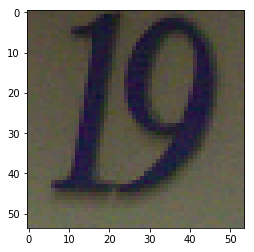

In [154]:
#Example of the reading output 
print(Pic_crop_Final[0],label_Final[0])
plt.imshow(Pic_crop_Final[0])

In [169]:
#Reshape the data from 54,54,3 into 54*54*3
import numpy as np
c = []
for i in range(33401):
    a = np.reshape(Pic_crop_Final[i],54*54*3)
    c.append(a)
c = np.asarray(c)
print (c)


[[ 81  79  61 ... 105 107  93]
 [ 14  47 100 ...  72 135 202]
 [130 150 148 ... 135 141 137]
 ...
 [198 215 222 ... 188 208 209]
 [117 114 105 ...  99 102  95]
 [ 16  32  68 ...  20  30  65]]


In [170]:
#Generate CSV for all the cropped data 
import numpy
a = c
numpy.savetxt("foo.csv", a, delimiter=",")

In [181]:
#Generate CSV for all the labels

import numpy
a =[float(x) for x in label_Final]
a = np.asarray(a)
# print (a)
numpy.savetxt("label.csv",a, delimiter=",")